<a href="https://colab.research.google.com/github/datasocode/Tests-Statistiques/blob/main/Analyse_des_KPI_des_Ventes_et_Comportement_des_Clients_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Capture%20d%E2%80%99e%CC%81cran%202023-02-17%20a%CC%80%2013.17.10.png](attachment:Capture%20d%E2%80%99e%CC%81cran%202023-02-17%20a%CC%80%2013.17.10.png)

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import plotly.express as px

import warnings
warnings.filterwarnings(action='ignore')

#import warnings
#warnings.filterwarnings(action='default')

#  1 . L'exploration et la visualisation de données

# 1.1 Customers

### 8623 individus : l'identifiant, le sexe et l'année de naissance.

In [ ]:
customers = pd.read_csv('customers.csv', sep = ',')
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [ ]:
customers.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [ ]:
# vérifier l'unicité de la clé

customers['client_id'].duplicated().sum()

0

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [ ]:
# répartiton par genre

customers['sex'].value_counts(normalize = True).round(4)

f    0.5208
m    0.4792
Name: sex, dtype: float64

In [ ]:
# répartiton par genre customers['sex'].value_counts()

customers['sex'].value_counts()

f    4491
m    4132
Name: sex, dtype: int64

In [ ]:
plt.rcParams['image.cmap'] = 'viridis'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 10

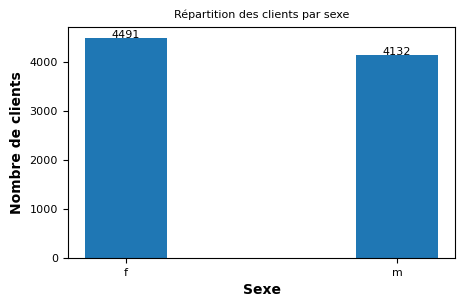

In [ ]:
plt.figure(figsize=(5, 3))

sex_counts = customers['sex'].value_counts()

plt.bar(sex_counts.index, sex_counts.values, width=0.3)
plt.xlabel('Sexe')
plt.ylabel('Nombre de clients')
plt.title('Répartition des clients par sexe',fontsize=8)

for i in range(len(sex_counts)):
    plt.text(x = i, y = sex_counts.values[i], s = sex_counts.values[i], ha='center', fontsize=8);

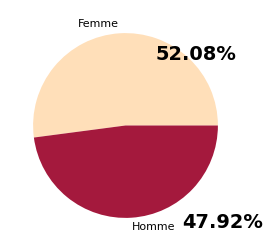

In [ ]:
size_of_groups = [52.08, 47.92]
colors = ['#FFDFB9', '#A4193D']
names = ['Femme', 'Homme']

fig, ax = plt.subplots(figsize=(3,3))

ax.pie(size_of_groups, labels=names, colors=colors)

for i, v in enumerate(size_of_groups):
    ax.text(1.3*np.sin(np.pi*(i/len(size_of_groups) + 0.2)),
            1.3*np.cos(np.pi*(i/len(size_of_groups) + 0.3)), f"{v:.2f}%",
            fontweight='bold', fontsize=14, ha='center', va='center');

In [ ]:
femme = customers.loc[customers['sex']== 'f']
femme.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
6,c_285,f,1967


In [ ]:
women = femme.pivot_table('sex', index = ['birth'],
                 columns = 'sex', aggfunc = 'count')
women.head()

sex,f
birth,
1929,1
1930,3
1931,2
1932,5
1933,5


In [ ]:
homme = customers.loc[customers['sex']== 'm']
homme.head()

,client_id,sex,birth
4,c_5320,m,1943
5,c_415,m,1993
8,c_6446,m,1971
9,c_6866,m,1993
10,c_1013,m,1982


In [ ]:
men = homme.pivot_table('sex', index = ['birth'],
                 columns = 'sex', aggfunc = 'count')
men.head()

sex,m
birth,
1929,2
1930,1
1931,2
1932,1
1933,3


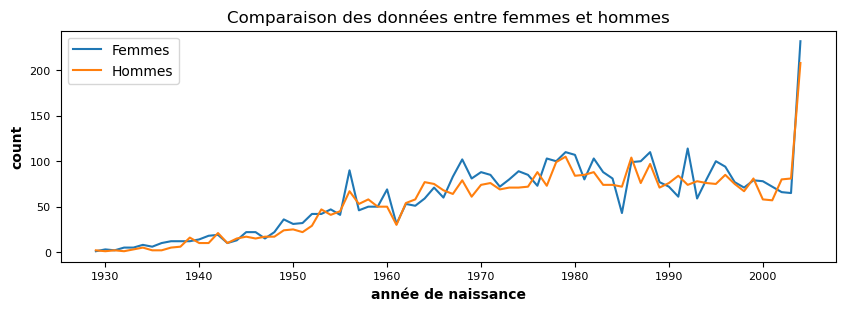

In [ ]:
plt.figure(figsize=(10, 3))

plt.plot(women,label='Femmes')
plt.plot(men,label='Hommes')
plt.xlabel('année de naissance')
plt.ylabel('count')
plt.title('Comparaison des données entre femmes et hommes')
plt.legend();

In [ ]:
customers.shape

(8623, 3)

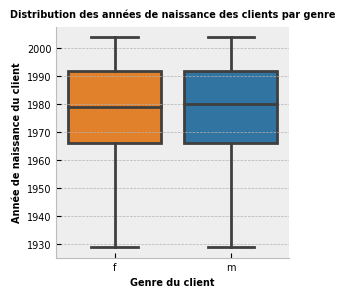

In [ ]:
plt.style.use('bmh')
plt.rcParams["figure.figsize"] = (3,3)
ax = sns.boxplot(x=customers['sex'], y=customers['birth'], palette=['#FF7F0E','#1F77B4'])
plt.xlabel("Genre du client", fontsize=7, fontweight='bold')
plt.ylabel("Année de naissance du client", fontsize=7, fontweight='bold')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title("Distribution des années de naissance des clients par genre", fontsize=7, fontweight='bold')
sns.despine();

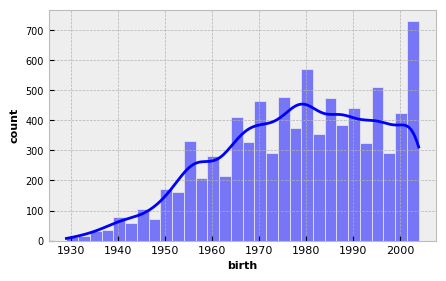

In [ ]:
plt.figure(figsize=(5, 3))

sns.histplot(data=customers, x='birth', kde=True)
plt.ylabel("count",fontsize=8)
plt.xlabel('birth',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=7);

In [ ]:
stats.normaltest(customers['birth'])

NormaltestResult(statistic=511.145768233699, pvalue=1.0141605292306432e-111)

L'ensemble de données de 8623 clients est un ensemble de données contenant des informations sur des clients.
* La clé primaire est l'ID du client, qui est unique pour chaque client.
* Il n'y a aucun doublon dans cet ensemble de données et aucune valeur manquante.
* Les clients dans cet ensemble de données sont âgés de 18 à 93 ans et se répartissent également entre hommes et femmes.
* La répartition des catégories d'achat entre les hommes et les femmes est quasi équivalente.
* Il y a un pic dans le nombre de personnes nées en 2004.


# 1.2 Products

### 3287 livres : l'identifiant, le prix et la catégorie

In [ ]:
products = pd.read_csv('products.csv',sep = ',')
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [ ]:
products.shape

(3287, 3)

In [ ]:
products['categ'] = products['categ'].astype(int)
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [ ]:
products['price'].value_counts(normalize=True).sort_values(ascending = False)

4.99     0.025859
6.99     0.025555
3.99     0.024338
5.99     0.023730
8.99     0.022513
           ...   
21.16    0.000304
12.62    0.000304
12.95    0.000304
54.87    0.000304
25.16    0.000304
Name: price, Length: 1455, dtype: float64

In [ ]:
# vérifier les valeurs manquantes et les doublons : products

products.duplicated().sum()

0

In [ ]:
products.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [ ]:
products['categ'].nunique()

3

In [ ]:
# l'unicité de la clé respectée

products['id_prod'].duplicated().sum()

0

In [ ]:
# constater la valeur -1.0 la colonne 'price'

products.sort_values(by = "price", ascending = True).head()

,id_prod,price,categ
731,T_0,-1.00,0
2355,0_202,0.62,0
2272,0_528,0.62,0
370,0_120,0.66,0
1211,0_1844,0.77,0


In [ ]:
products.groupby('categ').sum()

,price
categ,
0,27078.29
1,18867.72
2,25896.77


### eliminer -1.00 €

In [ ]:
products_df = products[products['price'] != -1.0]
products_df.describe()

,price,categ
count,3286.000000,3286.000000
mean,21.863597,0.370359
std,29.849786,0.615446
min,0.620000,0.000000
25%,6.990000,0.000000
50%,13.075000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


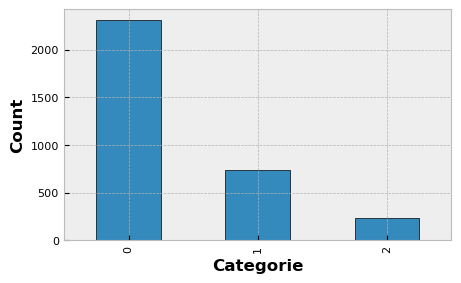

In [ ]:
fig = plt.figure(figsize=(5, 3))

products_df['categ'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Categorie')
plt.ylabel('Count');

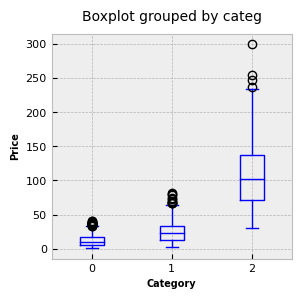

In [ ]:
ax = products_df.boxplot(column='price',by='categ', color='blue', figsize=(3, 3))
ax.set_xlabel('Category', fontsize=7)
ax.set_ylabel('Price', fontsize=7)
ax.set_title('')
plt.show()

In [ ]:
categ = products_df.groupby('categ')
categ['price'].describe()

,count,mean,std,min,25%,50%,75%,max
categ,,,,,,,,
0,2308.0,11.732795,7.565755,0.62,5.5875,10.32,16.655,40.99
1,739.0,25.531421,15.425162,2.00,13.3900,22.99,33.990,80.99
2,239.0,108.354686,49.561431,30.99,71.0650,101.99,136.530,300.00


In [ ]:
categ.median()

,price
categ,
0,10.32
1,22.99
2,101.99


In [ ]:
products_df['categ'].value_counts(normalize=True).sort_values(ascending = False).round(3)

0    0.702
1    0.225
2    0.073
Name: categ, dtype: float64

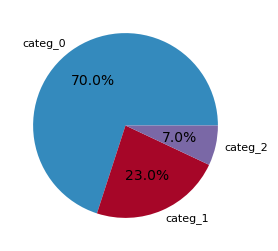

In [ ]:
plt.figure(figsize=(3, 3))
colors = ['#66B2FF', '#0072B2', '#003C71']
categorie = ['categ_0', 'categ_1', 'categ_2']
values = [70, 23, 7]
plt.pie(values, labels=categorie, autopct='%.1f%%');

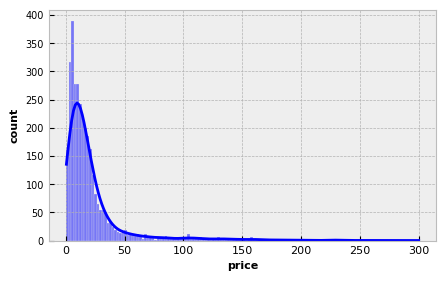

In [ ]:
# distribution des prix

# Ho : la distribution des données de cette série est normale.
# Ha : la distribution des données de cette série ne suivra pas une distribution normale.

plt.figure(figsize=(5, 3))

sns.histplot(data=products_df, x='price', kde=True)
plt.ylabel( "count",fontsize=8)
plt.xlabel('price',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=7);

In [ ]:
from scipy.stats import normaltest

stats.normaltest(products_df['price'])

NormaltestResult(statistic=2627.9652000972355, pvalue=0.0)

L'ensemble de données de 3287 livres contient des informations sur des livres, avec l'ID du produit comme clé primaire, ce qui signifie qu'il n'y a aucun doublon dans cet ensemble de données.
* Aucune valeur manquante n'est présente dans cet ensemble de données.
* Les livres de cet ensemble de données appartiennent à trois catégories différentes, dont la catégorie 0 représente 70 % des éléments.
* La fourchette de prix des livres est comprise entre -1,00 € et 300 €, ce qui suggère une large gamme de prix.

# 1.3 Transactions

### la date et les identifiants de la session, du client et du produit vendu

In [ ]:
transactions = pd.read_csv('transactions.csv',sep = ',')
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [ ]:
transactions.shape

(679532, 4)

In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [ ]:
# vérifier les valeurs manquantes et les doublons : transactions

transactions.duplicated().sum()

126

In [ ]:
transactions.loc[transactions.duplicated()]

,id_prod,date,session_id,client_id
27778,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
52424,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
96687,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
130188,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
139339,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
...,...,...,...,...
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [ ]:
transactions.sort_values(by = 'date')

,id_prod,date,session_id,client_id
480642,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
428477,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
462702,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
488300,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
439073,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033
...,...,...,...,...
392443,T_0,test_2021-03-01 02:30:02.237448,s_0,ct_0
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
19312,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0
573155,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0


In [ ]:
# vérifier les doublons

transactions[transactions.duplicated()]

,id_prod,date,session_id,client_id
27778,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
52424,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
96687,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
130188,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
139339,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
...,...,...,...,...
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [ ]:
transactions.loc[transactions['id_prod'] == "T_0"]

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [ ]:
from datetime import datetime

### id_prod T_0 : 200 lignes

In [ ]:
transactions.loc[transactions['id_prod'] == 'T_0']

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [ ]:
test = transactions[transactions['date'].str.contains('test')]
test

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


### Suppression les lignes test_date

In [ ]:
# selectionner que les clients ct_0,ct_1

mask = ~((transactions['id_prod'] == 'T_0'))

# eliminer  les clients T_0

transactions_df = transactions.loc[mask]

In [ ]:
# convertir la colonne date en datetime
transactions_df['date'] = pd.to_datetime(transactions_df['date'],format='%Y-%m-%d')

timestamp = transactions_df['date']
timestamp

0        2022-05-20 13:21:29.043970
1        2022-02-02 07:55:19.149409
2        2022-06-18 15:44:33.155329
3        2021-06-24 04:19:29.835891
4        2023-01-11 08:22:08.194479
                    ...            
679527   2022-01-15 13:05:06.246925
679528   2022-03-19 16:03:23.429229
679529   2022-12-20 04:33:37.584749
679530   2021-07-16 20:36:35.350579
679531   2022-09-28 01:12:01.973763
Name: date, Length: 679332, dtype: datetime64[ns]

In [ ]:
transactions_df['time'] = pd.to_datetime(timestamp)

In [ ]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   time        679332 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 31.1+ MB


In [ ]:
# Conversion de la colonne 'date' en objet datetime et extraction de la date
transactions_df['time'] = pd.to_datetime(transactions_df['date']).dt.date
transactions_df

,id_prod,date,session_id,client_id,time
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-20
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02-02
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06-18
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06-24
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01-11
...,...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,2022-01-15
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,2022-03-19
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,2022-12-20
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,2021-07-16


In [ ]:
transactions_df.duplicated().sum()

0

In [ ]:
# la période de transaction : 2021/03/01 - 2023/02/28 sur 24 mois


transactions_df.sort_values(by ='date').head()

,id_prod,date,session_id,client_id,time
480642,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,2021-03-01
428477,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,2021-03-01
462702,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,2021-03-01
488300,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,2021-03-01
439073,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,2021-03-01


In [ ]:
transactions_df.sort_values(by ='date').tail()

,id_prod,date,session_id,client_id,time
184649,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573,2023-02-28
588183,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,2023-02-28
130172,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,2023-02-28
550455,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,2023-02-28
84274,0_1398,2023-02-28 23:58:30.792755,s_348435,c_3575,2023-02-28


In [ ]:
transactions_df.duplicated().sum()

0

In [ ]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   time        679332 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 31.1+ MB


In [ ]:
transactions_date = transactions_df.groupby(transactions_df['time']).count()
transactions_date

,id_prod,date,session_id,client_id
time,,,,
2021-03-01,963,963,963,963
2021-03-02,940,940,940,940
2021-03-03,911,911,911,911
2021-03-04,903,903,903,903
2021-03-05,943,943,943,943
...,...,...,...,...
2023-02-24,894,894,894,894
2023-02-25,905,905,905,905
2023-02-26,890,890,890,890


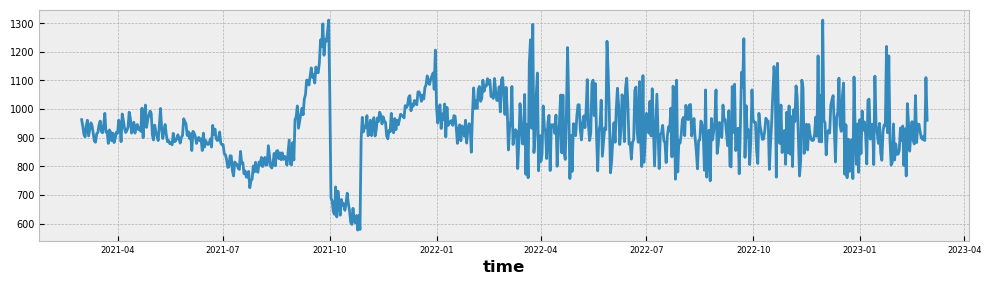

In [ ]:
plt.xticks(fontsize=6)
plt.yticks(fontsize=7)
transactions_date['client_id'].plot(figsize= (12,3));

In [ ]:
transactions_df.duplicated().sum()

0

### Les clients B2B

In [ ]:
transactions['client_id'].value_counts()

c_1609    25488
c_6714     9187
c_3454     6773
c_4958     5195
c_3263      403
          ...  
c_4478        1
c_5962        1
c_4223        1
c_6292        1
c_1624        1
Name: client_id, Length: 8602, dtype: int64

In [ ]:
mask = (transactions_df['client_id'] == 'c_1609') | (transactions_df['client_id'] == 'c_6714') | (transactions_df['client_id'] == 'c_3454') | (transactions_df['client_id'] == 'c_4958')
mask

0         False
1         False
2          True
3         False
4         False
          ...  
679527    False
679528    False
679529    False
679530    False
679531    False
Name: client_id, Length: 679332, dtype: bool

In [ ]:
transactions_df.loc[(transactions_df['client_id'] == 'c_1609') | (transactions_df['client_id'] == 'c_6714') | (transactions_df['client_id'] == 'c_3454') | (transactions_df['client_id'] == 'c_4958')]

,id_prod,date,session_id,client_id,time
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06-18
17,1_661,2022-09-13 10:18:02.746197,s_267366,c_6714,2022-09-13
32,1_426,2021-06-21 17:47:57.023863,s_51846,c_4958,2021-06-21
63,1_506,2021-09-29 03:52:29.731798,s_97203,c_4958,2021-09-29
67,0_1446,2022-10-05 07:43:00.225116,s_278030,c_1609,2022-10-05
...,...,...,...,...,...
679429,0_1419,2021-04-02 13:23:57.034357,s_14951,c_1609,2021-04-02
679453,2_185,2021-03-08 01:39:03.755607,s_3255,c_4958,2021-03-08
679490,0_1609,2021-10-15 16:58:58.818380,s_105230,c_6714,2021-10-15
679502,0_1442,2022-07-24 00:48:15.130619,s_242786,c_6714,2022-07-24


### Suppression des clients B2B

In [ ]:
transactions_df = transactions_df[~mask]
transactions_df

,id_prod,date,session_id,client_id,time
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-20
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02-02
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06-24
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01-11
5,0_1418,2022-10-20 15:59:16.084030,s_285425,c_1478,2022-10-20
...,...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,2022-01-15
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,2022-03-19
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,2022-12-20
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,2021-07-16


In [ ]:
transactions_df['time'] = pd.to_datetime(transactions_df['time'])

In [ ]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632689 entries, 0 to 679531
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     632689 non-null  object        
 1   date        632689 non-null  datetime64[ns]
 2   session_id  632689 non-null  object        
 3   client_id   632689 non-null  object        
 4   time        632689 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 29.0+ MB


Cet ensemble de données contient des informations sur 679532 transactions effectuées sur une période de 24 mois, du 1er mars 2021 au 28 février 2023.
* La clé primaire pour chaque transaction est composée de l'ID client et de la date de la transaction.
* La clé étrangère relie chaque transaction à un produit spécifique grâce à l'ID client et l'ID du produit.
* Il y a 126 doublons dans cet ensemble de données, mais il n'y a aucune valeur manquante.
* Les dates commençant par "test" se trouvent dans les identifiants de produit T_O.
* Les clients B2B font partie de cet ensemble de données, ce qui suggère que les transactions peuvent être à la fois de nature B2C et B2B.
* La période de transaction montre une chute au mois d'octobre.
* Les dates ont été converties au format datetime pour une analyse plus facile des tendances temporelles.

# 2. Jointure

In [ ]:
#.merge : la table 'customers' et la table transactions

customers_transactions = pd.merge(customers,transactions_df, on = 'client_id', how = 'outer')
customers_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632716 entries, 0 to 632715
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   client_id   632716 non-null  object        
 1   sex         632716 non-null  object        
 2   birth       632716 non-null  int64         
 3   id_prod     632689 non-null  object        
 4   date        632689 non-null  datetime64[ns]
 5   session_id  632689 non-null  object        
 6   time        632689 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 38.6+ MB


In [ ]:
customers_transactions.isnull().sum()

client_id      0
sex            0
birth          0
id_prod       27
date          27
session_id    27
time          27
dtype: int64

In [ ]:
# .merge : la table 'customers_transaction' et la table 'products'

ctp = pd.merge(customers_transactions,products_df, on = 'id_prod',how = 'outer' )
ctp.head()

,client_id,sex,birth,id_prod,date,session_id,time,price,categ
0,c_4410,f,1967.0,0_1316,2021-12-29 09:11:18.860592,s_141762,2021-12-29,7.2,0.0
1,c_4410,f,1967.0,0_1316,2022-03-29 09:11:18.860592,s_186233,2022-03-29,7.2,0.0
2,c_4410,f,1967.0,0_1316,2022-05-29 09:11:18.860592,s_215758,2022-05-29,7.2,0.0
3,c_3654,f,1978.0,0_1316,2021-11-26 03:51:34.068872,s_125143,2021-11-26,7.2,0.0
4,c_3654,f,1978.0,0_1316,2022-08-26 03:51:34.068872,s_258546,2022-08-26,7.2,0.0


In [ ]:
ctp.duplicated().sum()

0

### Suppression les valeurs nulll

In [ ]:
ctp.isnull().sum()

client_id      24
sex            24
birth          24
id_prod        27
date           51
session_id     51
time           51
price         239
categ         239
dtype: int64

In [ ]:
ctp_df = ctp.dropna()
ctp_df.shape

(632477, 9)

In [ ]:
categ_price = pd.pivot_table(ctp_df,index = 'categ',values = 'price',aggfunc = 'sum')
categ_price

,price
categ,
0.0,4119200.69
1.0,4349432.99
2.0,2504064.46


In [ ]:
ctp_df.describe()

,birth,price,categ
count,632477.000000,632477.000000,632477.000000
mean,1977.785633,17.348770,0.439611
std,13.848064,18.096583,0.591798
min,1929.000000,0.620000,0.000000
25%,1971.000000,8.820000,0.000000
50%,1979.000000,13.990000,0.000000
75%,1987.000000,18.990000,1.000000
max,2004.000000,300.000000,2.000000


In [ ]:
ctp_df.duplicated().sum()

0

### Calcul de l'âge

In [ ]:
# calculer l'âge

ctp_df['age'] = 2023 - ctp_df['birth']
ctp_df.head()

,client_id,sex,birth,id_prod,date,session_id,time,price,categ,age
0,c_4410,f,1967.0,0_1316,2021-12-29 09:11:18.860592,s_141762,2021-12-29,7.2,0.0,56.0
1,c_4410,f,1967.0,0_1316,2022-03-29 09:11:18.860592,s_186233,2022-03-29,7.2,0.0,56.0
2,c_4410,f,1967.0,0_1316,2022-05-29 09:11:18.860592,s_215758,2022-05-29,7.2,0.0,56.0
3,c_3654,f,1978.0,0_1316,2021-11-26 03:51:34.068872,s_125143,2021-11-26,7.2,0.0,45.0
4,c_3654,f,1978.0,0_1316,2022-08-26 03:51:34.068872,s_258546,2022-08-26,7.2,0.0,45.0


In [ ]:
birth_counts = ctp_df['birth'].value_counts().to_frame()
birth_counts.reindex
birth_counts.sort_values(by ='birth', ascending = False).head()

,birth
1988.0,25000
1979.0,24878
1978.0,24659
1986.0,23465
1980.0,21921


In [ ]:
# pivot table

p_table = pd.pivot_table(ctp_df, index=['birth'], aggfunc= {'price': 'sum'})
p_table.sort_values(by = 'price', ascending = True).head()

,price
birth,
1931.0,2815.45
1929.0,3221.85
1930.0,4013.87
1935.0,4793.55
1932.0,5043.19


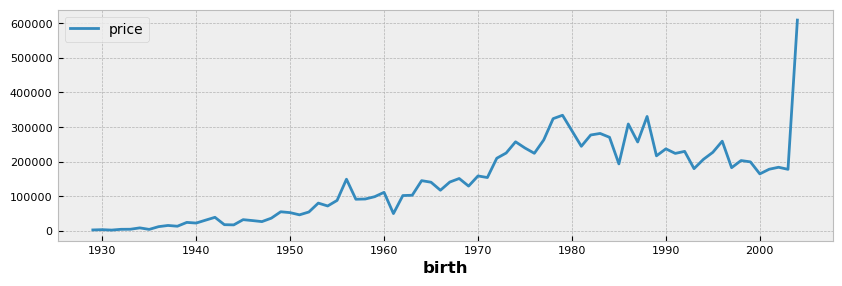

In [ ]:
fig, ax = plt.subplots(figsize = (10,3))
p_table.plot(ax=ax);

### Création de la colonne 'age_group'


In [ ]:
ctp_df.loc[(ctp_df['age'] >= 19) & (ctp_df['age'] <= 29 ), 'age_group'] = 'de 18 à 29'
ctp_df.loc[(ctp_df['age'] >= 30) & (ctp_df['age'] <= 39 ), 'age_group'] = 'de 30 à 39'
ctp_df.loc[(ctp_df['age'] >= 40) & (ctp_df['age'] <= 49 ), 'age_group'] = 'de 40 à 49'
ctp_df.loc[(ctp_df['age'] >= 50) & (ctp_df['age'] <= 59 ), 'age_group'] = 'de 50 à 59'
ctp_df.loc[(ctp_df['age'] >= 60) & (ctp_df['age'] <= 69 ), 'age_group'] = 'de 60 à 69'
ctp_df.loc[(ctp_df['age'] >= 70) & (ctp_df['age'] <= 79 ), 'age_group'] = 'de 70 à 79'
ctp_df.loc[(ctp_df['age'] >= 80) & (ctp_df['age'] <= 89 ), 'age_group'] = 'de 80 à 89'
ctp_df.loc[(ctp_df['age'] >= 90) & (ctp_df['age'] <= 100), 'age_group'] = 'de 90 à 100'

ctp_df.head()

,client_id,sex,birth,id_prod,date,session_id,time,price,categ,age,age_group
0,c_4410,f,1967.0,0_1316,2021-12-29 09:11:18.860592,s_141762,2021-12-29,7.2,0.0,56.0,de 50 à 59
1,c_4410,f,1967.0,0_1316,2022-03-29 09:11:18.860592,s_186233,2022-03-29,7.2,0.0,56.0,de 50 à 59
2,c_4410,f,1967.0,0_1316,2022-05-29 09:11:18.860592,s_215758,2022-05-29,7.2,0.0,56.0,de 50 à 59
3,c_3654,f,1978.0,0_1316,2021-11-26 03:51:34.068872,s_125143,2021-11-26,7.2,0.0,45.0,de 40 à 49
4,c_3654,f,1978.0,0_1316,2022-08-26 03:51:34.068872,s_258546,2022-08-26,7.2,0.0,45.0,de 40 à 49


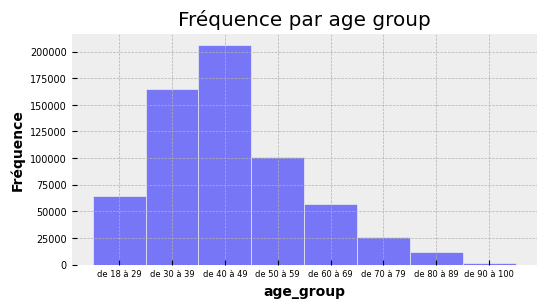

In [ ]:
ctp_df_age_group = ctp_df.sort_values(by='age_group')
fig, ax = plt.subplots(figsize=(6, 3))

sns.histplot(ctp_df_age_group, x='age_group', kde=False, bins=None, color='blue', alpha=0.5)
plt.xlabel('age_group', fontsize=10)
plt.ylabel('Fréquence', fontsize=10)
plt.xticks(fontsize=6)
plt.yticks(fontsize=7)
sns.despine(left=True, bottom=True)
plt.title("Fréquence par age group");

In [ ]:
ctp_df['panier_mean'] = ctp_df.groupby('client_id')['price'].transform('mean').round(2)
ctp_df["nb_achat"] = ctp_df.groupby('client_id')['price'].transform('count')
ctp_df["total_achat"] = ctp_df.groupby('client_id')['price'].transform('sum')

In [ ]:
ctp_df.head(2)

,client_id,sex,birth,id_prod,date,session_id,time,price,categ,age,age_group,panier_mean,nb_achat,total_achat
0,c_4410,f,1967.0,0_1316,2021-12-29 09:11:18.860592,s_141762,2021-12-29,7.2,0.0,56.0,de 50 à 59,18.12,76,1376.82
1,c_4410,f,1967.0,0_1316,2022-03-29 09:11:18.860592,s_186233,2022-03-29,7.2,0.0,56.0,de 50 à 59,18.12,76,1376.82


# 3 . Analyse du chiffre d'affaires

### Par jour

In [ ]:
ca_jour = ctp_df.groupby('time').sum()['price']
ca_jour_total = ca_jour.reset_index()
ca_jour_total.head()

,time,price
0,2021-03-01,15468.65
1,2021-03-02,14558.47
2,2021-03-03,13899.99
3,2021-03-04,13567.62
4,2021-03-05,16216.09


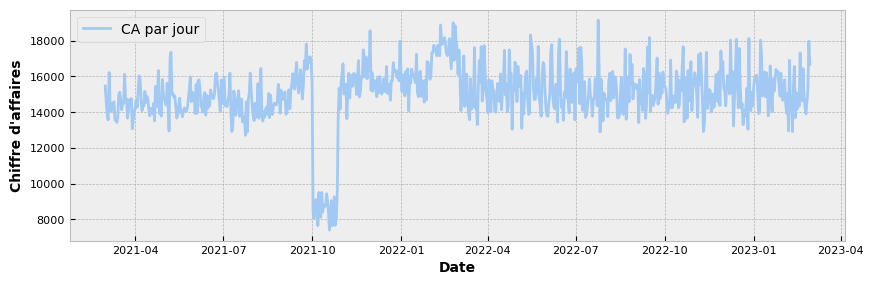

In [ ]:
plt.figure(figsize = (10,3))
sns.set_palette('pastel')
ca = sns.lineplot( x= 'time', y = 'price',data= ca_jour_total,label='CA par jour')
ca.set_xlabel('Date', size = 10)
ca.set_ylabel("Chiffre d'affaires", size = 10);

### CA par catégorie

In [ ]:
pv_sum = ctp_df.pivot_table('price', index = ['time'],
                 columns = 'categ', aggfunc = 'sum')
pv_sum.head()

categ,0.0,1.0,2.0
time,,,
2021-03-01,5935.72,6375.49,3157.44
2021-03-02,6164.28,5253.16,3141.03
2021-03-03,5728.49,5217.22,2954.28
2021-03-04,5437.75,5614.73,2515.14
2021-03-05,5506.90,6522.55,4186.64


### Nombre de ventes par catégorie

In [ ]:
pv_df = ctp_df.pivot_table('price', index = ['time'],
                 columns = 'categ', aggfunc = 'count')
pv_df.head()

categ,0.0,1.0,2.0
time,,,
2021-03-01,550.0,313.0,42.0
2021-03-02,569.0,258.0,43.0
2021-03-03,548.0,258.0,37.0
2021-03-04,527.0,272.0,33.0
2021-03-05,517.0,307.0,48.0


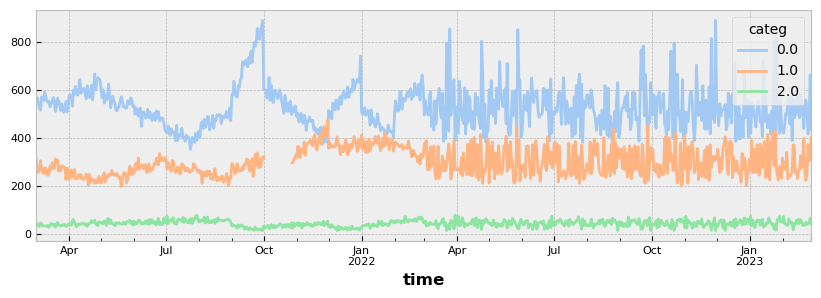

In [ ]:
fig, ax = plt.subplots(figsize = (10,3))
pv_df.plot(ax=ax);

In [ ]:
ctp_df.loc[:, 'pr_month'] = ctp_df['time'].dt.to_period(freq='M').dt.to_timestamp().dt.strftime('%Y-%m-%d')
ctp_df.loc[:, 'pr_year'] = ctp_df['time'].dt.year

In [ ]:
ctp_df.head()

,client_id,sex,birth,id_prod,date,session_id,time,price,categ,age,age_group,panier_mean,nb_achat,total_achat,pr_month,pr_year
0,c_4410,f,1967.0,0_1316,2021-12-29 09:11:18.860592,s_141762,2021-12-29,7.2,0.0,56.0,de 50 à 59,18.12,76,1376.82,2021-12-01,2021
1,c_4410,f,1967.0,0_1316,2022-03-29 09:11:18.860592,s_186233,2022-03-29,7.2,0.0,56.0,de 50 à 59,18.12,76,1376.82,2022-03-01,2022
2,c_4410,f,1967.0,0_1316,2022-05-29 09:11:18.860592,s_215758,2022-05-29,7.2,0.0,56.0,de 50 à 59,18.12,76,1376.82,2022-05-01,2022
3,c_3654,f,1978.0,0_1316,2021-11-26 03:51:34.068872,s_125143,2021-11-26,7.2,0.0,45.0,de 40 à 49,12.69,168,2131.23,2021-11-01,2021
4,c_3654,f,1978.0,0_1316,2022-08-26 03:51:34.068872,s_258546,2022-08-26,7.2,0.0,45.0,de 40 à 49,12.69,168,2131.23,2022-08-01,2022


### Evolution du chiffre d'affaires et total ventes

In [ ]:
df_by_year_month = ctp_df.groupby('pr_month').agg(total_sales=('pr_month', 'count'),
                                                  revenue=('price', 'sum')).reset_index()

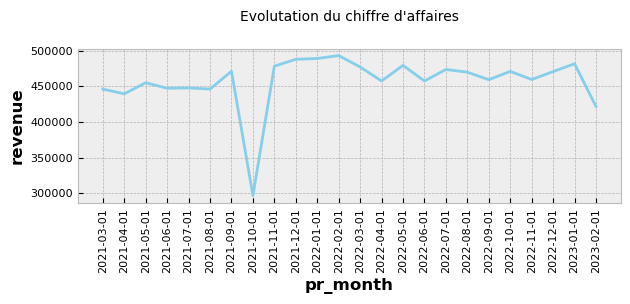

In [ ]:
plt.figure(figsize=(7,2))

lineplot = sns.lineplot(x="pr_month", y="revenue", color='skyblue',
                        data=df_by_year_month)
plt.xticks(rotation=90)
plt.title("Evolutation du chiffre d'affaires", pad=20, fontsize = 10);

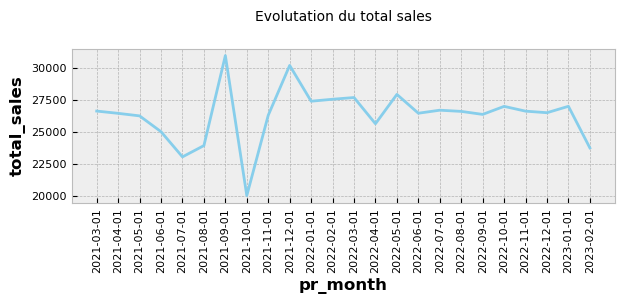

In [ ]:
plt.figure(figsize=(7,2))

lineplot = sns.lineplot(x="pr_month", y="total_sales", color='skyblue',
                        data=df_by_year_month)
plt.xticks(rotation=90)
plt.title("Evolutation du total sales", pad=20,  fontsize = 10);

### CA et total ventes en 2021 et en 2022

In [ ]:
ctp_df['fiscal_year'] = 2021
ctp_df['fiscal_year'].loc[ctp_df[ctp_df['time'] >= '2022-03-01'].index] = 2022

In [ ]:
list_fiscal_years = list(ctp_df['fiscal_year'].unique())
list_fiscal_years.sort()

In [ ]:
list_categ = list(products['categ'].unique())
list_categ

[0, 1, 2]

In [ ]:
df_categ_dict = {}

for i in list_categ :
    df_temp = ctp_df[ctp_df['categ'] == i]

    df_temp = df_temp.groupby(['fiscal_year', 'pr_month']).agg(
        total_sales=('pr_month', 'count'), revenue=('price', 'sum')
        ).reset_index()

    df_temp['AOV'] = df_temp['revenue'] / df_temp['total_sales']
    df_temp = df_temp.drop(df_temp[df_temp.pr_month == 'Oct'].index)

    df_categ_dict[i] = df_temp

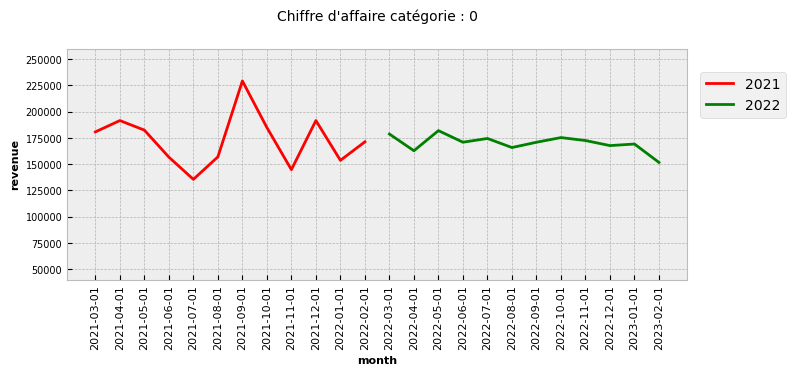

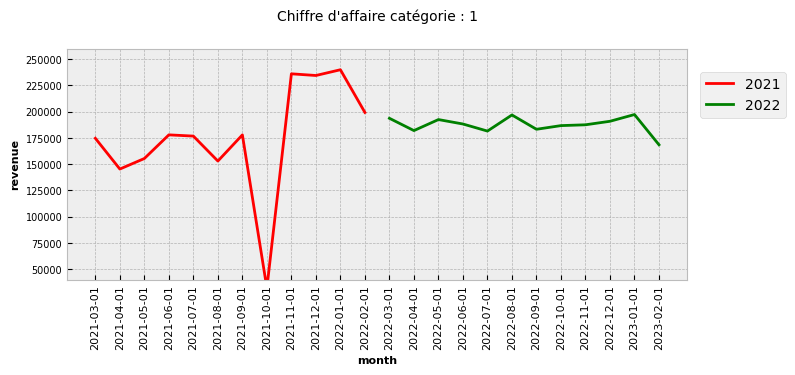

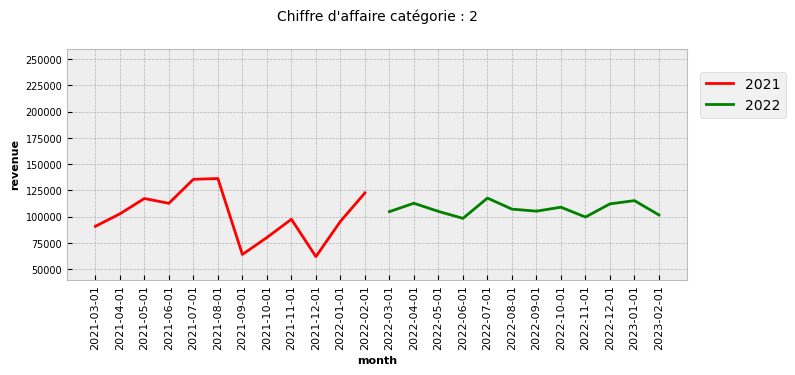

In [ ]:
for categ in df_categ_dict:
    df_temp = df_categ_dict[categ]

    plt.figure(figsize=(8,3))
    sns.lineplot(x="pr_month", y="revenue", data=df_temp, hue='fiscal_year', palette=["red", "green"])
    plt.ylim(40000,260000)
    plt.legend(labels=["2021", "2022"],loc='center right', bbox_to_anchor=(1.17, 0.8), ncol=1, fontsize=10)
    plt.title("Chiffre d'affaire catégorie : %i" %categ, pad=20, fontsize= 10)
    plt.ylabel("revenue",fontsize=8)
    plt.xlabel('month',fontsize=8)
    plt.xticks(rotation = 90,fontsize=8)
    plt.yticks(fontsize=7)
    plt.show()

In [ ]:
ctp_df.groupby('pr_year')['price'].sum()

pr_year
2021    4414307.27
2022    5655420.93
2023     902969.94
Name: price, dtype: float64

In [ ]:
ctp_df.groupby('pr_year')['id_prod'].count()

pr_year
2021    259015
2022    322670
2023     50792
Name: id_prod, dtype: int64

### CA et total ventes en 2021 et en 2022 avec les moyennes mobiles

In [ ]:
ctp_df['fiscal_year'] = 2021
ctp_df['fiscal_year'].loc[ctp_df[ctp_df['time'] >= '2022-03-01'].index] = 2022

In [ ]:
list_fiscal_years = list(ctp_df['fiscal_year'].unique())
list_fiscal_years.sort()
list_fiscal_years

[2021, 2022]

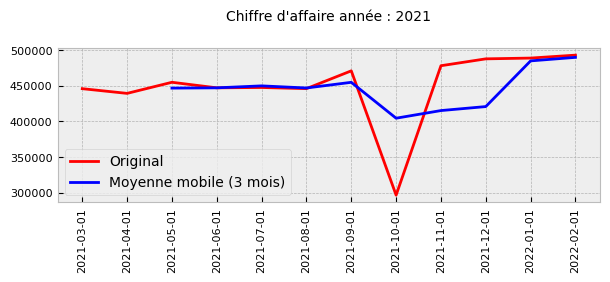

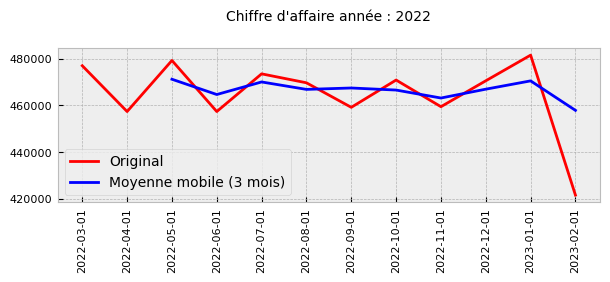

In [ ]:
for fiscal_year in list_fiscal_years:

    df_temp = ctp_df[ctp_df['fiscal_year'] == fiscal_year]
    df_temp = df_temp.groupby('pr_month').agg(
        total_sales=('pr_month', 'count'), revenue=('price', 'sum')).reset_index()
    df_temp = df_temp[['pr_month', 'revenue']].set_index('pr_month')
    rolling_mean = df_temp.rolling(window = 3).mean()

    plt.figure(figsize=(7,2))
    plt.plot(df_temp, color = 'red', label = 'Original')
    plt.plot(rolling_mean, color = 'blue', label = 'Moyenne mobile (3 mois)')
    plt.xticks(rotation=90)
    plt.legend(loc = 'best')
    plt.title("Moyenne mobiles chiffre d'affaire", fontsize = 8)
    plt.title("Chiffre d'affaire année : %i" % fiscal_year, pad=20, fontsize = 10)
    plt.show()

* Pour l'année 2021, on observe une tendance haussière du chiffre d'affaires au cours de l'année, à l'exception d'une chute enregistrée au mois d'octobre. Globalement, le chiffre d'affaires a augmenté sur cette période.
* En ce qui concerne l'année 2022, le chiffre d'affaires est resté globalement stable tout au long de l'année.

In [ ]:
df_ca = ctp_df.groupby('fiscal_year').sum().reset_index()

# chiffre d'affaire année fiscale 2021
df_ca_2021 = df_ca[(df_ca['fiscal_year'] == 2021)]
ca_2021 = df_ca.iloc[0]['price']

# chiffre d'affaire année fiscale 2021
df_ca_2022 = df_ca[(df_ca['fiscal_year'] == 2022)]
ca_2022 = df_ca_2022.iloc[0]['price']

# difference chiffre d'affaire
diff_ca = ca_2022 - ca_2021

# evolution
evo_ca = round(( diff_ca / ca_2021) * 100 ,2)

In [ ]:
print(f"""
Chiffre d'affaire année 2021 : {ca_2021:.0f}
Chiffre d'affaire année 2022 : {ca_2022:.0f}

Différence de chiffre d'affaire : {diff_ca:.0f} ({evo_ca}%)
""")


Chiffre d'affaire année 2021 : 5396044
Chiffre d'affaire année 2022 : 5576654

Différence de chiffre d'affaire : 180609 (3.35%)



Le chiffre d'affaire de l'année fiscale 2022 est suppérieur à celui de 2021.

In [ ]:
df_id_prod = ctp_df.groupby('pr_year')['id_prod'].count()

# years
sales_2021 = df_id_prod[2021]
sales_2022 = df_id_prod[2022]
sales_2023 = df_id_prod[2023]

increase_2022 = round(((sales_2022 - sales_2021) / sales_2021) * 100, 2)
increase_2023 = round(((sales_2023 - sales_2022) / sales_2022) * 100, 2)

print("2021: ", sales_2021)
print("2022: ", sales_2022)
print("L'augmentation des ventes totales en 2022 par rapport à 2021:", increase_2022, "%")

2021:  259015
2022:  322670
L'augmentation des ventes totales en 2022 par rapport à 2021: 24.58 %


### Croissance de 2021 à 2022

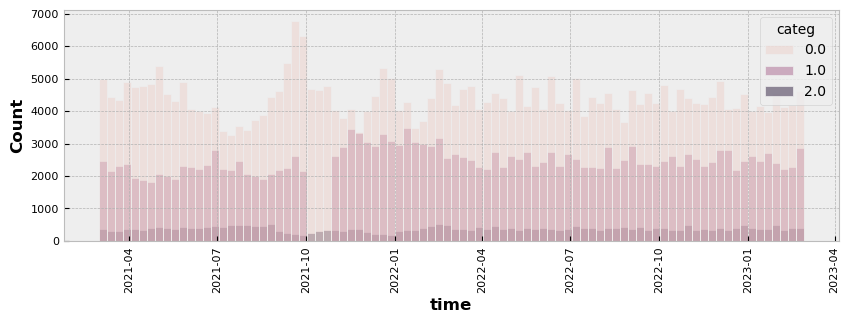

In [ ]:
fig = plt.figure(figsize=(10, 3))

sns.histplot(data=ctp_df, x='time', hue='categ')
plt.xticks(rotation=90, size = 8);

In [ ]:
pv_df= ctp_df.pivot_table('price', index = ['pr_year'],
                 columns = 'categ', aggfunc = 'sum', margins=True)
pv_df.head()

categ,0.0,1.0,2.0,All
pr_year,,,,
2021,1753518.14,1662568.07,998221.06,4414307.27
2022,2045001.66,2321290.35,1289128.92,5655420.93
2023,320680.89,365574.57,216714.48,902969.94
All,4119200.69,4349432.99,2504064.46,10972698.14


In [ ]:
pv_df= ctp_df.pivot_table('price', index = ['pr_year'],
                 columns = 'categ', aggfunc = 'count', margins=True)
pv_df.head()

categ,0.0,1.0,2.0,All
pr_year,,,,
2021,164827,81100,13088,259015
2022,192315,113410,16945,322670
2023,30139,17838,2815,50792
All,387281,212348,32848,632477


In [ ]:
croissance_2021_2022 = (pv_df.loc[2022, :] - pv_df.loc[2021, :]) / pv_df.loc[2021, :] * 100
print("Croissance de 2021 à 2022 :\n", croissance_2021_2022)

Croissance de 2021 à 2022 :
 categ
0.0    16.676879
1.0    39.839704
2.0    29.469743
All    24.575797
dtype: float64


In [ ]:
pv_sexe= ctp_df.pivot_table('price', index = ['pr_year'],
                 columns = 'sex', aggfunc = 'count', margins=True)
pv_sexe.head()

sex,f,m,All
pr_year,,,
2021,134325,124690,259015
2022,168260,154410,322670
2023,26519,24273,50792
All,329104,303373,632477


In [ ]:
croissance_2021_2022 = (pv_sexe.loc[2022, :] - pv_sexe.loc[2021, :]) / pv_sexe.loc[2021, :] * 100
print("Croissance de 2021 à 2022 :\n", croissance_2021_2022)

Croissance de 2021 à 2022 :
 sex
f      25.263354
m      23.835111
All    24.575797
dtype: float64


In [ ]:
pv_age= ctp_df.pivot_table('price', index = ['pr_year'],
                 columns = 'age_group', aggfunc = 'sum', margins=True)
pv_age.head()

age_group,de 18 à 29,de 30 à 39,de 40 à 49,de 50 à 59,de 60 à 69,de 70 à 79,de 80 à 89,de 90 à 100,All
pr_year,,,,,,,,,
2021,1021349.53,1004351.46,1123649.09,627030.69,380976.60,172324.99,76818.78,7806.13,4414307.27
2022,1349031.17,1245030.53,1396361.41,823343.79,501132.55,228414.54,101473.77,10633.17,5655420.93
2023,224512.18,200947.83,217057.76,126071.44,80118.71,36166.57,16186.04,1909.41,902969.94
All,2594892.88,2450329.82,2737068.26,1576445.92,962227.86,436906.10,194478.59,20348.71,10972698.14


In [ ]:
croissance_2021_2022 = (pv_age.loc[2022, :] - pv_age.loc[2021, :]) / pv_age.loc[2021, :] * 100
print("Croissance de 2021 à 2022 :\n", croissance_2021_2022)

Croissance de 2021 à 2022 :
 age_group
de 18 à 29     32.083203
de 30 à 39     23.963630
de 40 à 49     24.270239
de 50 à 59     31.308372
de 60 à 69     31.538932
de 70 à 79     32.548703
de 80 à 89     32.095003
de 90 à 100    36.215641
All            28.115706
dtype: float64


### CA et Moyenne mobile

In [ ]:
ca_jour =  ctp_df.groupby('time').sum()['price']
ca_journalier = ca_jour.reset_index()
ca_journalier.set_index('time', inplace=True)
ca_journalier['Moyenne mobile sur 15 jours'] = ca_journalier['price'].rolling(15).mean()
ca_journalier.head(5)

,price,Moyenne mobile sur 15 jours
time,,
2021-03-01,15468.65,NaN
2021-03-02,14558.47,NaN
2021-03-03,13899.99,NaN
2021-03-04,13567.62,NaN
2021-03-05,16216.09,NaN


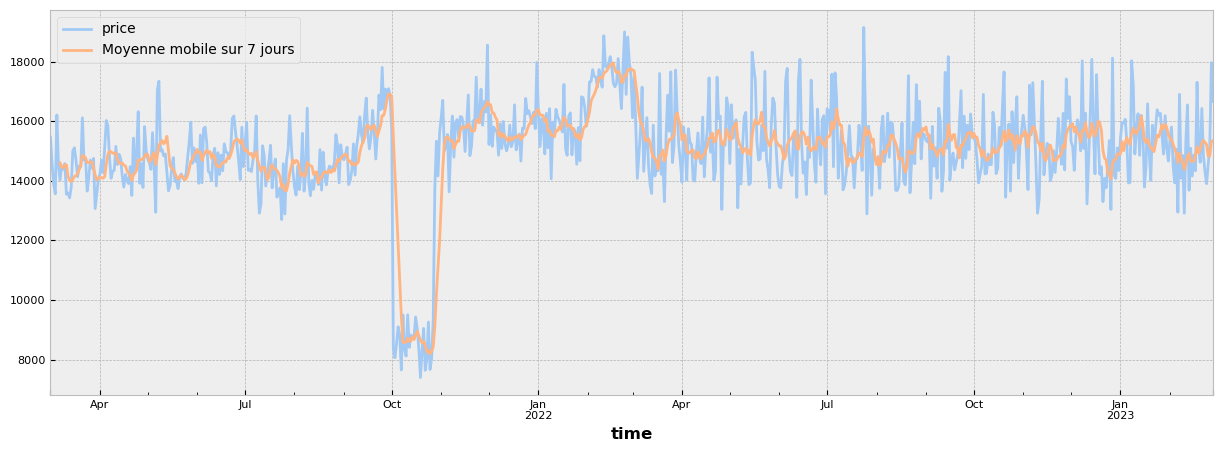

In [ ]:
ca_journalier['Moyenne mobile sur 7 jours'] = ca_journalier['price'].rolling(7).mean()
var = ['price', 'Moyenne mobile sur 7 jours']
ca_journalier[var].plot(figsize=(15, 5));

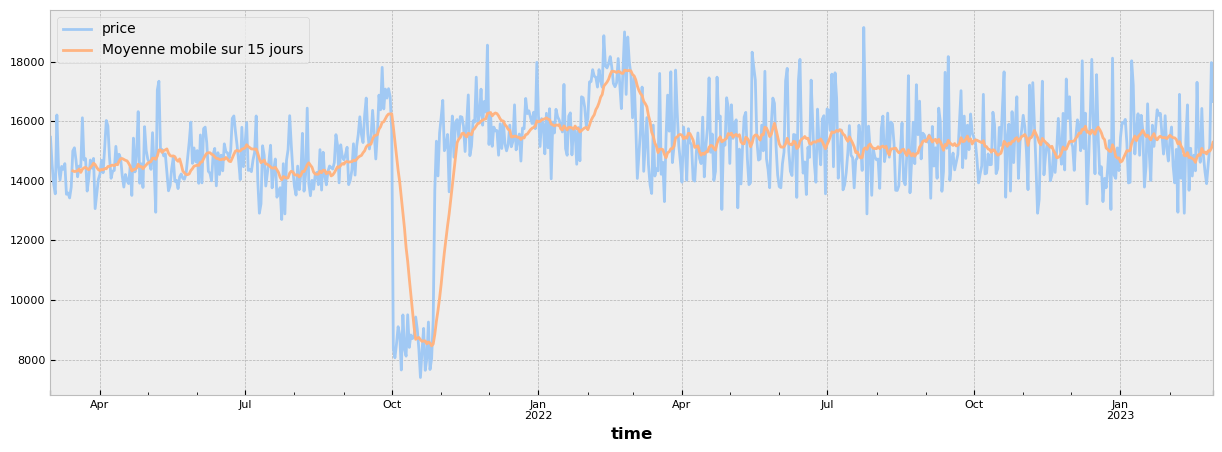

In [ ]:
ca_journalier['Moyenne mobile sur 15 jours'] = ca_journalier['price'].rolling(15).mean()
var = ['price', 'Moyenne mobile sur 15 jours']
ca_journalier[var].plot(figsize=(15, 5));

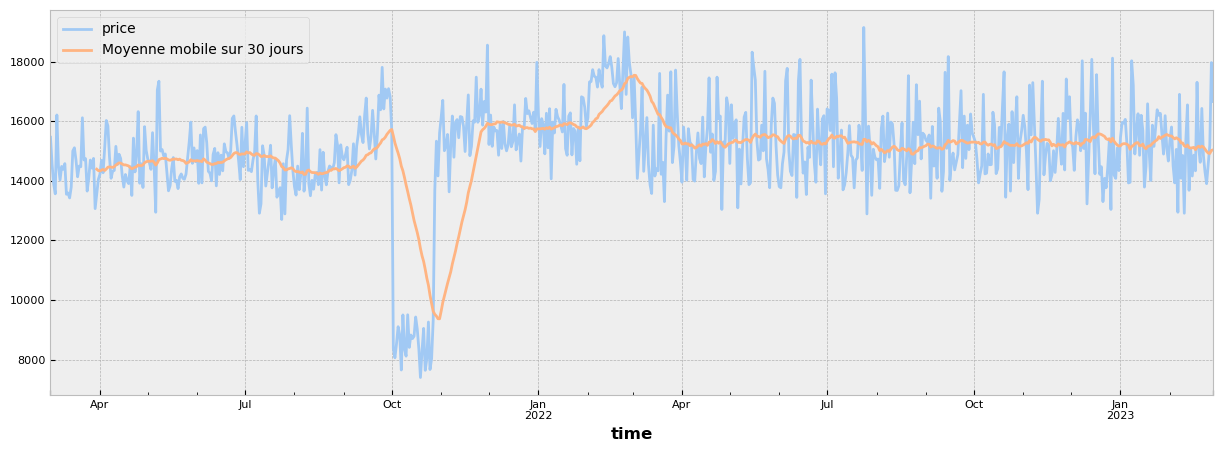

In [ ]:
ca_journalier['Moyenne mobile sur 30 jours'] = ca_journalier['price'].rolling(30).mean()
var = ['price', 'Moyenne mobile sur 30 jours']
ca_journalier[var].plot(figsize=(15, 5));

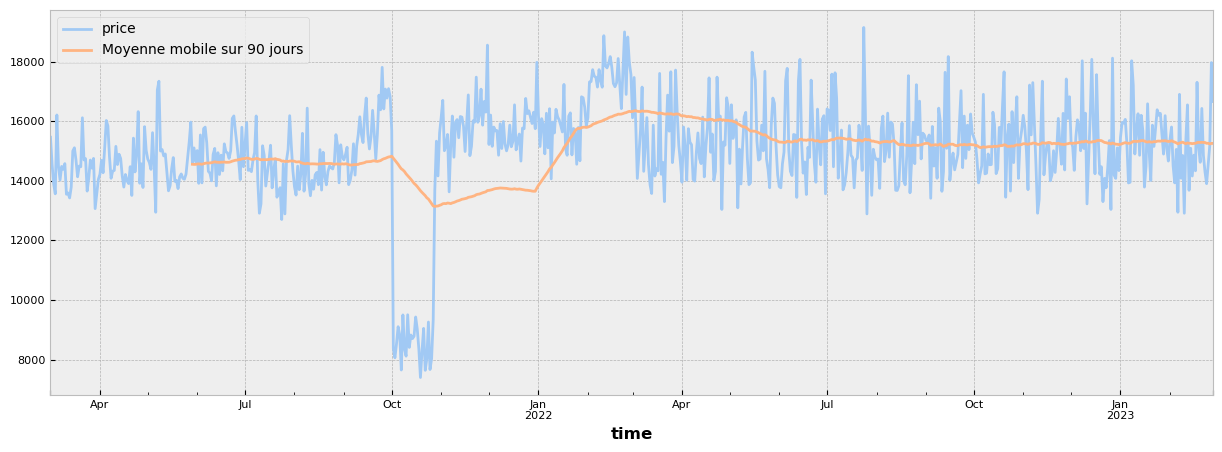

In [ ]:
ca_journalier['Moyenne mobile sur 90 jours'] = ca_journalier['price'].rolling(90).mean()
var = ['price', 'Moyenne mobile sur 90 jours']
ca_journalier[var].plot(figsize=(15, 5));

### Chiffre d'affaires par âge et par sexe

In [ ]:
age_group_ca = ctp_df.groupby(['age_group','sex']).sum()['price'].reset_index()
age_group_ca.head()

,age_group,sex,price
0,de 18 à 29,f,1350670.79
1,de 18 à 29,m,1244222.09
2,de 30 à 39,f,1221588.69
3,de 30 à 39,m,1228741.13
4,de 40 à 49,f,1443491.83


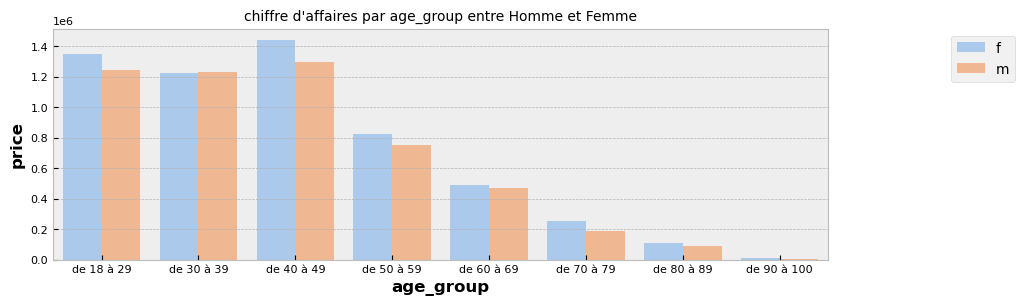

In [ ]:
fig, ax = plt.subplots(figsize=(10, 3))

sns.barplot(data=age_group_ca, x="age_group", y="price", hue="sex", ax=ax)
plt.title("chiffre d'affaires par age_group entre Homme et Femme", fontsize=10)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), fontsize=10);

### Comparaison du chiffre d'affaires par sex

In [ ]:
year_sex = ctp_df.groupby(['pr_year', 'sex']).sum().reset_index()
year_sex

,pr_year,sex,birth,price,categ,age,panier_mean,nb_achat,total_achat,fiscal_year
0,2021,f,265638089.0,2290000.50,55900.0,6101386.0,2318136.86,18116280,2.667948e+08,271470825
1,2021,m,246654091.0,2124306.77,51376.0,5593779.0,2149738.53,17072591,2.504064e+08,251998490
2,2022,f,332727846.0,2942387.23,77103.0,7662134.0,2923145.03,22863612,3.390013e+08,340192781
3,2022,m,305425868.0,2713033.70,70197.0,6945562.0,2691484.74,21077080,3.123214e+08,312190974
4,2023,f,52440535.0,473696.48,12288.0,1207402.0,464821.60,3626654,5.405435e+07,53621418
5,2023,m,48017495.0,429273.46,11180.0,1086784.0,425392.76,3345278,4.970178e+07,49080006


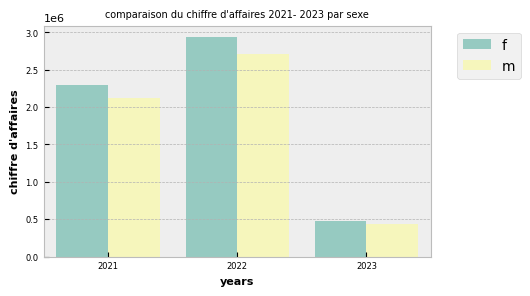

In [ ]:
plt.figure(figsize=(5,3))
plt.xticks(fontsize= 6)
plt.yticks(fontsize= 6)
t = sns.barplot(x='pr_year', y='price', hue='sex', data=year_sex, palette='Set3',dodge=0.8)
t.set_xlabel("years", fontsize = 8)
t.set_ylabel("chiffre d'affaires", fontsize = 8)
plt.title("comparaison du chiffre d'affaires 2021- 2023 par sexe",fontsize = 7)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), fontsize=10);

In [ ]:
ctp_df_ca = ctp_df.groupby(['pr_year','categ']).sum()['price']
df_categ = ctp_df_ca.reset_index()
df_categ.head()

,pr_year,categ,price
0,2021,0.0,1753518.14
1,2021,1.0,1662568.07
2,2021,2.0,998221.06
3,2022,0.0,2045001.66
4,2022,1.0,2321290.35


### Par categorie

In [ ]:
prod = ctp_df.groupby(['id_prod','categ']).sum()['price']
prod_sort =prod.sort_values(ascending = False).reset_index()
prod_sort.head()

,id_prod,categ,price
0,2_159,2.0,91097.76
1,2_135,2.0,63470.80
2,2_112,2.0,58785.90
3,2_102,2.0,55650.74
4,1_369,1.0,50834.81


In [ ]:
categ_prod = prod_sort.groupby('categ').count()
categ_count = categ_prod.reset_index()
categ_count

,categ,id_prod,price
0,0.0,2290,2290
1,1.0,737,737
2,2.0,235,235


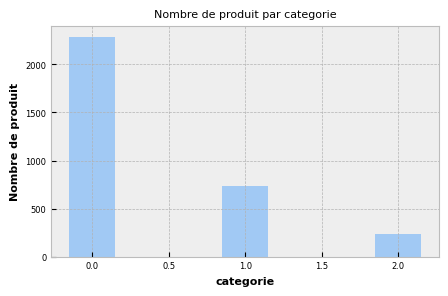

In [ ]:
plt.figure(figsize=(5, 3))
plt.bar(categ_count.categ, categ_count.price, width=0.3)
plt.xlabel('categorie',fontsize=8)
plt.ylabel('Nombre de produit',fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.title('Nombre de produit par categorie',fontsize=8);

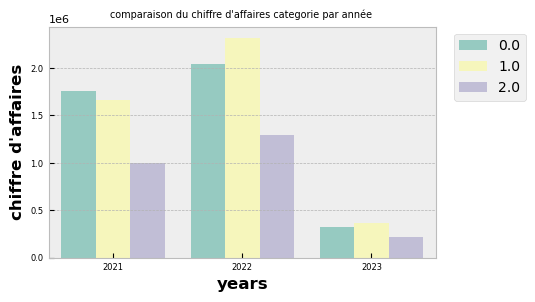

In [ ]:
# le lien entre le genre d’un client et les catégories des livres achetés

plt.figure(figsize=(5,3))
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
j = sns.barplot(x='pr_year', y='price', hue='categ', data=df_categ, palette='Set3')
j.set_xlabel("years")
j.set_ylabel("chiffre d'affaires")
plt.title("comparaison du chiffre d'affaires categorie par année ", fontsize = 7)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), fontsize=10);

In [ ]:
prod = ctp_df.groupby(['id_prod','categ']).sum()['price']
prod_sort = prod.sort_values(ascending = False).reset_index()
prod_sort.head()

,id_prod,categ,price
0,2_159,2.0,91097.76
1,2_135,2.0,63470.80
2,2_112,2.0,58785.90
3,2_102,2.0,55650.74
4,1_369,1.0,50834.81


In [ ]:
categ_prod_count = prod_sort.groupby('categ').count()
categ_count = categ_prod_count.reset_index()
categ_count

,categ,id_prod,price
0,0.0,2290,2290
1,1.0,737,737
2,2.0,235,235


In [ ]:
categ_prod = prod_sort.groupby('categ').sum()['price']
categ_ca=categ_prod.reset_index()
categ_ca

,categ,price
0,0.0,4119200.69
1,1.0,4349432.99
2,2.0,2504064.46


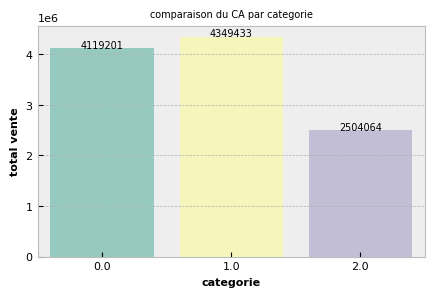

In [ ]:
plt.figure(figsize=(5,3))
cnt = sns.barplot(x='categ', y='price',data=categ_ca, palette='Set3')
cnt.set_xlabel("categorie",fontsize=8)
cnt.set_ylabel("total vente",fontsize=8)

for i, value in enumerate(categ_ca['price']):
    cnt.text(i, value, f'{value:.0f}', ha='center', fontsize = 7)

    plt.title("comparaison du CA par categorie" , fontsize=7);

In [ ]:
ctp_df['categ'].value_counts(normalize=True).sort_values(ascending = False).round(3)

0.0    0.612
1.0    0.336
2.0    0.052
Name: categ, dtype: float64

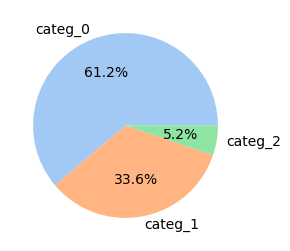

In [ ]:
plt.figure(figsize=(3, 3))
colors = ['#66B2FF', '#0072B2', '#003C71']
categorie = ['categ_0', 'categ_1', 'categ_2']
values = [0.612, 0.336, 0.052]
plt.pie(values, labels=categorie, autopct='%.1f%%',textprops={'fontsize': 10})
plt.rcParams.update({'font.size': 7}) ;

## Test Anova : chiffre d'affaires et les categories

* Ho : Il n'y a pas de différence significative entre les moyennes des chiffres d'affaires des différentes catégories de produits
* Ha : Il y a une différence significative entre les moyennes des chiffres d'affaires des différentes catégories de produits.

In [ ]:
# Obtenir les valeurs des chiffres d'affaires pour chaque catégorie
from scipy.stats import f_oneway, levene, ttest_ind

categ_0 = prod_sort[prod_sort['categ'] == 0]['price']
categ_1 = prod_sort[prod_sort['categ'] == 1]['price']
categ_2 = prod_sort[prod_sort['categ'] == 2]['price']

f_stat, p_value = stats.f_oneway(categ_0, categ_1, categ_2)

print("Statistique F :", f_stat)
print("Valeur p :", p_value)


Statistique F : 290.7493250330499
Valeur p : 6.476551367055592e-117


* Cela signifie que l'hypothèse nulle peut être rejetée et que les moyennes sont significativement différentes. Sinon, l'hypothèse nulle ne peut pas être rejetée et il n'y a pas suffisamment de preuves pour prouver une différence significative entre les moyennes.

## Test Anova : chiffre d'affaires et les genres

* Les genres influencent - ils mon chiffre d'affaires ?

* H0 : Mon chiffre d'affaires n'est pas influencé par les genres.
* H1 : Mon chiffre d'affaires est influencé par les genres.

In [ ]:
from scipy.stats import f_oneway, levene, ttest_ind

f, p = levene(ctp_df.loc[ctp_df["sex"]=="f", "price"], ctp_df.loc[ctp_df["sex"]=="m", "price"])

if p < 0.05:
    f, p = f_oneway(ctp_df.loc[ctp_df["sex"]=="f", "price"], ctp_df.loc[ctp_df["sex"]=="m", "price"])
    if p < 0.05:
        print("Il y a une différence significative entre les groupes.")
    else:
        print("Il n'y a pas de différence significative entre les groupes.")

else:
    t, p = ttest_ind(ctp_df.loc[ctp_df["sex"]=="f", "price"], ctp_df.loc[ctp_df["sex"]=="m", "price"], equal_var=False)
    if p < 0.05:
        print("Il y a une différence significative entre les groupes.")
    else:
        print("Il n'y a pas de différence significative entre les groupes.")

print("La p-value est de :", p)


Il n'y a pas de différence significative entre les groupes.
La p-value est de : 0.6300579957766932


###  Tranche d'âge

In [ ]:
prod = ctp_df.pivot_table('price', index = ['age_group'],
                 columns = 'categ', aggfunc = 'sum')
prod_reset = prod.reset_index()
prod_reset

categ,age_group,0.0,1.0,2.0
0,de 18 à 29,153405.90,494928.39,1946558.59
1,de 30 à 39,1277514.71,816485.28,356329.83
2,de 40 à 49,1665124.03,1001974.75,69969.48
3,de 50 à 59,577317.94,939171.72,59956.26
4,de 60 à 69,264417.20,652056.28,45754.38
5,de 70 à 79,123410.73,297328.13,16167.24
6,de 80 à 89,52653.71,133012.40,8812.48
7,de 90 à 100,5356.47,14476.04,516.20


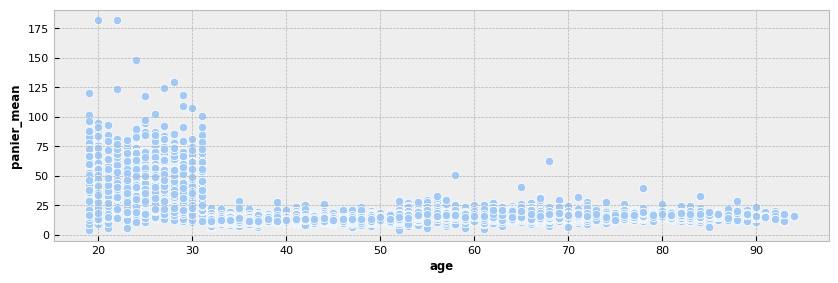

In [ ]:
plt.figure(figsize=(10,3))

sns.scatterplot(x = 'age', y = 'panier_mean', data = ctp_df);

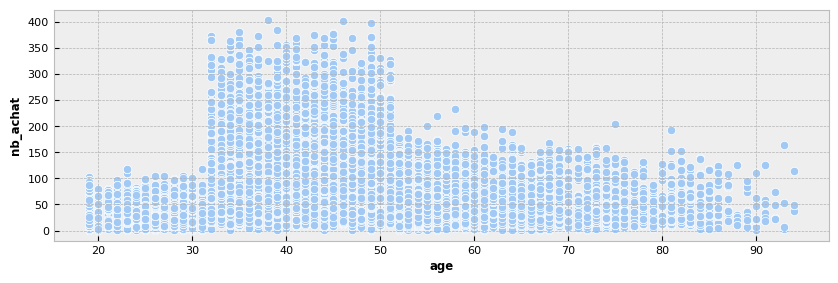

In [ ]:
plt.figure(figsize=(10,3))

sns.scatterplot(x = 'age', y = 'nb_achat', data = ctp_df);

<Figure size 1000x300 with 0 Axes>

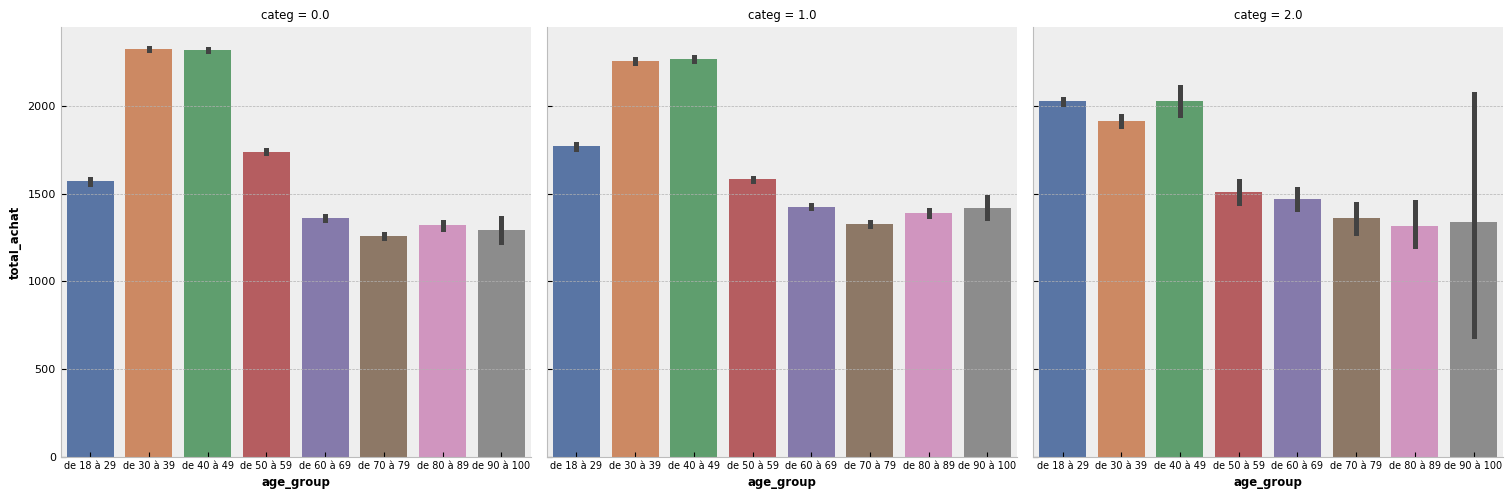

In [ ]:
plt.figure(figsize=(10, 3))
colors = sns.color_palette("deep", 8)

sorted_df = ctp_df.sort_values("age_group", ascending=True)

c = sns.catplot(data=sorted_df, x = "age_group", y = "total_achat",
             kind= "bar", col = "categ", col_wrap = 4, palette=colors)
c.set_xticklabels(fontsize=7);

<Figure size 500x500 with 0 Axes>

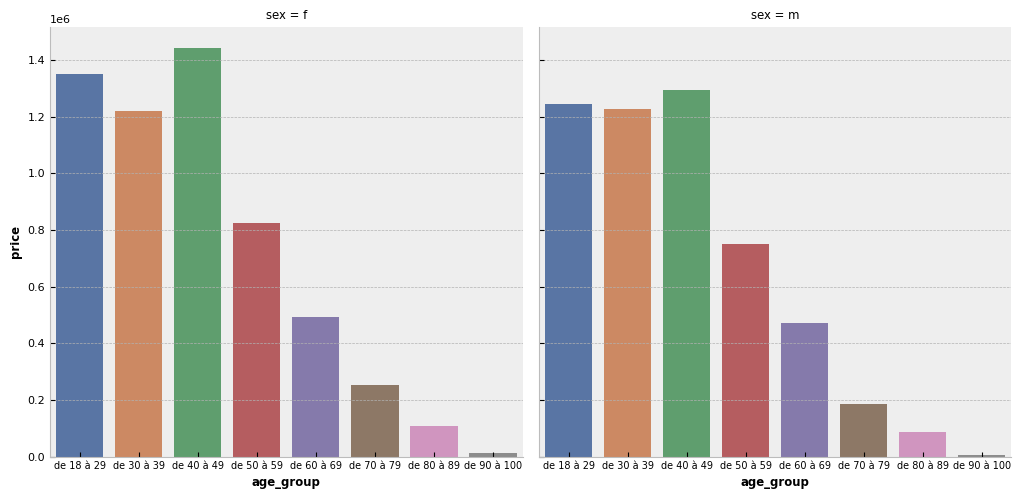

In [ ]:
## le lien entre l’âge des clients et le montant total des achats,
plt.figure(figsize=(5, 5))

colors = sns.color_palette("deep", 8)

v = sns.catplot(data=age_group_ca, x="age_group", y="price",
                kind="bar", col="sex", col_wrap=4, palette=colors)
v.set_xticklabels(fontsize=7);

<Figure size 1000x300 with 0 Axes>

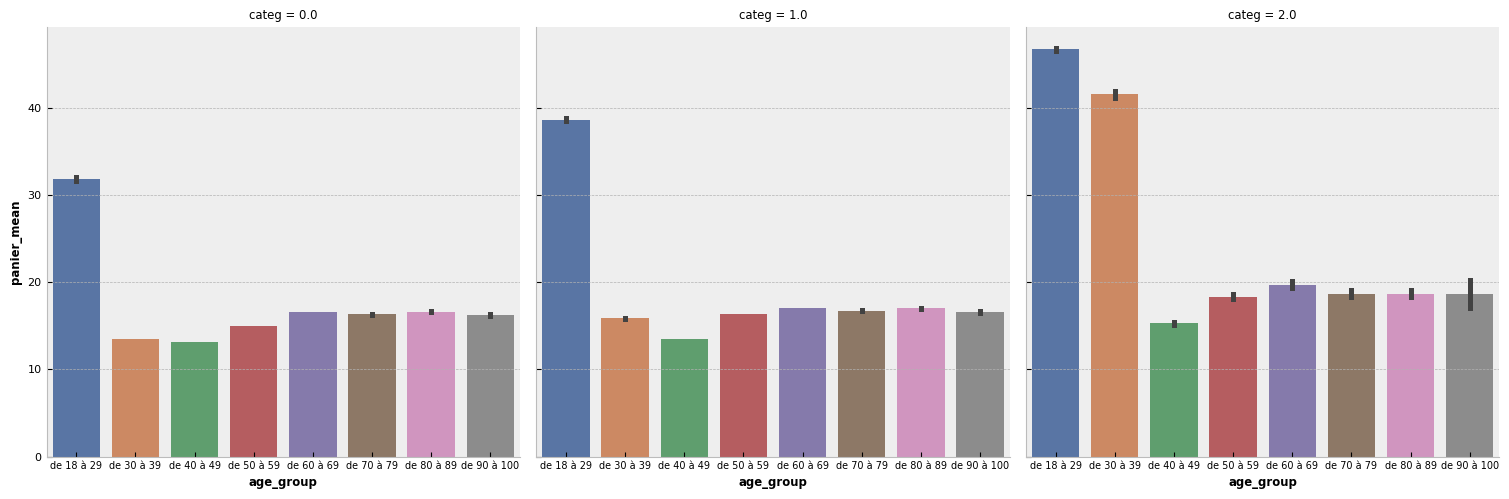

In [ ]:
## la taille du panier moyen et les catégories des livres achetés.

plt.figure(figsize=(10, 3))
colors = sns.color_palette("deep", 8)

sorted_df = ctp_df.sort_values("age_group", ascending=True)

c = sns.catplot(data=sorted_df, x = "age_group", y = "panier_mean",
             kind= "bar", col = "categ", col_wrap = 4, palette=colors)
c.set_xticklabels(fontsize=7)
plt.show()

In [ ]:
ctp_df.groupby(['categ']).agg({'id_prod':'count', 'price':'sum'})

,id_prod,price
categ,,
0.0,387281,4119200.69
1.0,212348,4349432.99
2.0,32848,2504064.46


### Corrélations

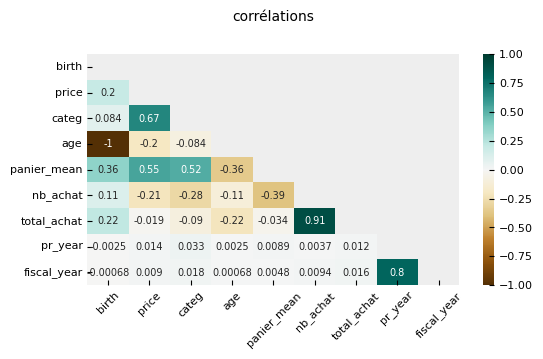

In [ ]:
plt.figure(figsize=(6, 3))

heatmap = sns.heatmap(ctp_df.corr(), mask=np.triu(np.ones_like(ctp_df.corr(),
                     dtype=bool)), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('corrélations', fontdict={'fontsize':10}, pad=24)
plt.xticks(rotation=45);

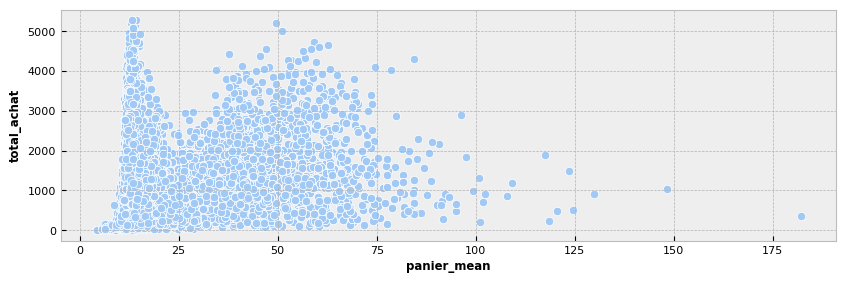

In [ ]:
plt.figure(figsize=(10, 3))

sns.scatterplot(x='panier_mean', y = 'total_achat', data = ctp_df);

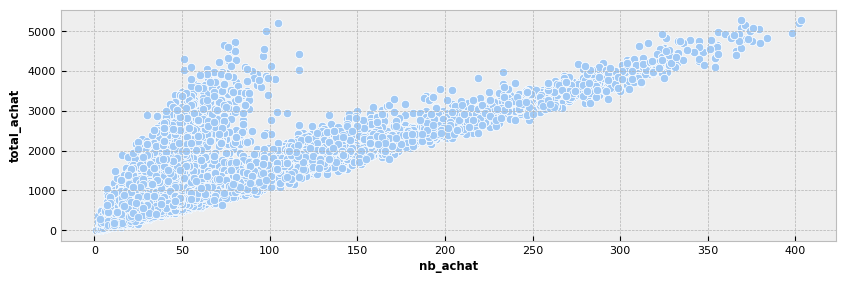

In [ ]:
plt.figure(figsize=(10, 3))

sns.scatterplot(x='nb_achat', y = 'total_achat', data = ctp_df);

# Chiffre d'affaires :  Période 01/04/2022 - 28/02/2023 ( 11 mois )

* La création de la boutique en ligne en 2020, ainsi que de la situation sanitaire exceptionnelle qui a suivi. Nous avons également constaté une diminution du chiffre d'affaires en octobre 2021 en raison d'un manque de stock dans la catégorie 1. Par conséquent, notre analyse se focalisera sur une période de 11 mois, allant du 1er avril 2022 au 28 février 2023, dans le but de mieux comprendre les comportements et les profils des clients.

In [ ]:
df=ctp_df.query("time >= '2022-04-01' and time <='2023-02-28'")
df.sort_values(by='time').head()

,client_id,sex,birth,id_prod,date,session_id,time,price,categ,age,age_group,panier_mean,nb_achat,total_achat,pr_month,pr_year,fiscal_year
65008,c_913,f,1977.0,0_1353,2022-04-01 05:25:21.989087,s_187587,2022-04-01,19.99,0.0,46.0,de 40 à 49,12.64,60,758.49,2022-04-01,2022,2022
461484,c_5494,m,1970.0,0_1230,2022-04-01 22:32:39.175925,s_187909,2022-04-01,12.83,0.0,53.0,de 50 à 59,15.31,18,275.55,2022-04-01,2022,2022
218517,c_5661,f,1969.0,0_0,2022-04-01 17:50:52.046656,s_187818,2022-04-01,3.75,0.0,54.0,de 50 à 59,12.13,24,291.12,2022-04-01,2022,2022
88562,c_2216,m,1991.0,0_1275,2022-04-01 12:23:25.326168,s_187709,2022-04-01,3.99,0.0,32.0,de 30 à 39,15.59,172,2682.08,2022-04-01,2022,2022
218018,c_3233,f,1966.0,1_351,2022-04-01 07:13:34.232457,s_187625,2022-04-01,28.99,1.0,57.0,de 50 à 59,14.17,50,708.32,2022-04-01,2022,2022


In [ ]:
df_ca_jour = df.groupby('time').sum()['price']
df_ca_jour_total = df_ca_jour.reset_index()
df_ca_jour_total.head()

,time,price
0,2022-04-01,13957.88
1,2022-04-02,15812.47
2,2022-04-03,15131.33
3,2022-04-04,14025.51
4,2022-04-05,15755.08


### CA par jour et les moyennes mobiles

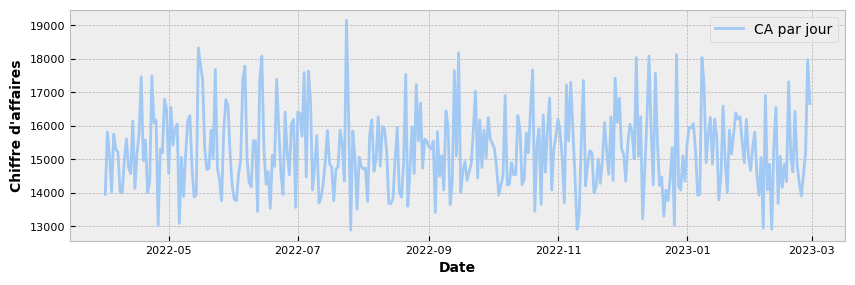

In [ ]:
plt.figure(figsize = (10,3))
sns.set_palette('pastel')
ca = sns.lineplot( x= 'time', y = 'price',data= df_ca_jour_total,label='CA par jour')
ca.set_xlabel('Date', size = 10)
ca.set_ylabel("Chiffre d'affaires", size = 10);

In [ ]:
df_ca_jour =  df.groupby('time').sum()['price']
df_ca_journalier = df_ca_jour.reset_index()
df_ca_journalier.set_index('time', inplace=True)
df_ca_journalier['Moyenne mobile sur 15 jours'] = df_ca_journalier['price'].rolling(15).mean()
df_ca_journalier.head(5)

,price,Moyenne mobile sur 15 jours
time,,
2022-04-01,13957.88,NaN
2022-04-02,15812.47,NaN
2022-04-03,15131.33,NaN
2022-04-04,14025.51,NaN
2022-04-05,15755.08,NaN


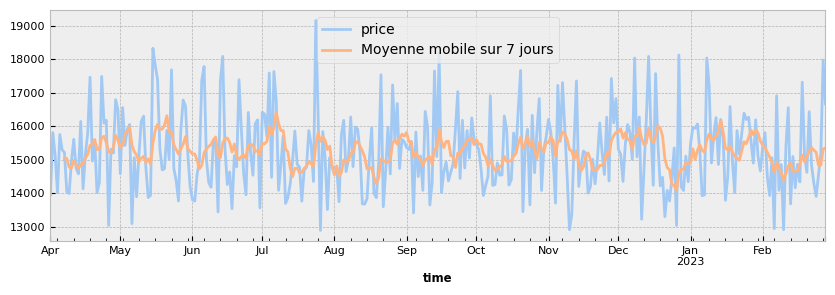

In [ ]:
df_ca_journalier['Moyenne mobile sur 7 jours'] = df_ca_journalier['price'].rolling(7).mean()
var = ['price', 'Moyenne mobile sur 7 jours']
df_ca_journalier[var].plot(figsize=(10, 3));

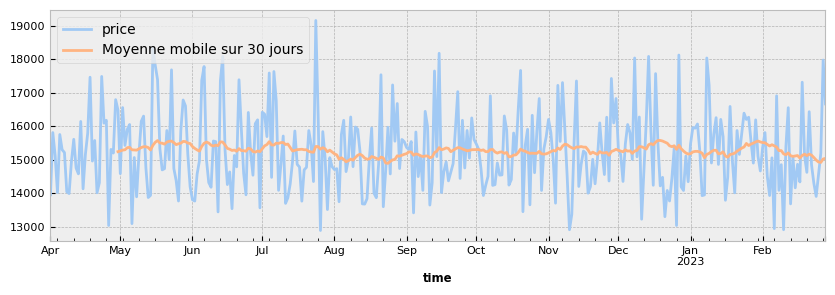

In [ ]:
df_ca_journalier['Moyenne mobile sur 30 jours'] = df_ca_journalier['price'].rolling(30).mean()
var = ['price', 'Moyenne mobile sur 30 jours']
df_ca_journalier[var].plot(figsize=(10, 3));

### Ratios de catégorie et d'âge

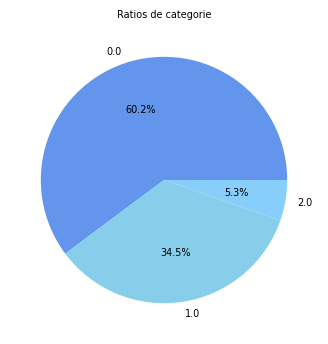

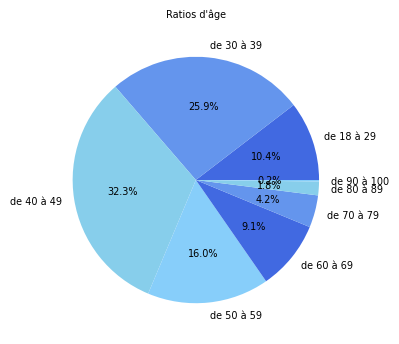

In [ ]:
plt.figure(figsize=(4, 4))

total = df['categ'].nunique()
counts = df.groupby('categ').size()
ratios = counts / total
plt.pie(ratios, labels = ratios.index, autopct='%1.1f%%',
        colors=['cornflowerblue','skyblue', 'lightskyblue'],
        textprops={'fontsize': 7})
plt.title("Ratios de categorie",fontsize= 7)

plt.figure(figsize=(4, 4))

total_age = df['age_group'].nunique()
counts_age = df.groupby('age_group').size()
ratios = counts_age / total_age
plt.pie(ratios, labels = ratios.index, autopct='%1.1f%%',textprops={'fontsize': 7},
        colors=['royalblue', 'cornflowerblue','skyblue', 'lightskyblue'])
plt.title("Ratios d'âge",fontsize= 7);

### CA par les tranches d'âge et  par les genres

In [ ]:
df_age_group_ca = df.groupby(['age_group','sex']).sum()['price'].reset_index()
df_age_group_ca.head()

,age_group,sex,price
0,de 18 à 29,f,644767.58
1,de 18 à 29,m,585363.49
2,de 30 à 39,f,559794.36
3,de 30 à 39,m,570684.93
4,de 40 à 49,f,663758.30


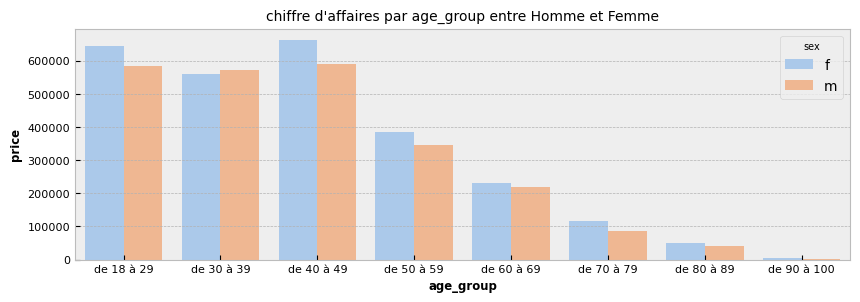

In [ ]:
fig, ax = plt.subplots(figsize=(10, 3))

sns.barplot(data=df_age_group_ca, x="age_group", y="price", hue="sex", ax=ax)
plt.title("chiffre d'affaires par age_group entre Homme et Femme", fontsize=10);

### CA / le panier moye et les tranches d'âge

Existe-t-il une corrélation significative entre les tranches d'âge et le chiffre d'affaires

* H0 : Il n'existe pas de relation significative entre les tranches d'âge des clients et le chiffre d'affaires.

* H1 : Il existe une relation significative entre les tranches d'âge des clients et le chiffre d'affaires.

In [ ]:
from scipy.stats import f_oneway, levene, ttest_ind

group1 = df[df['age_group'] == 'de 18 à 29']['price']
group2 = df[df['age_group'] == 'de 30 à 39']['price']
group3 = df[df['age_group'] == 'de 40 à 49']['price']
group4 = df[df['age_group'] == 'de 50 à 59']['price']
group5 = df[df['age_group'] == 'de 60 à 69']['price']
group6 = df[df['age_group'] == 'de 70 à 79']['price']
group7 = df[df['age_group'] == 'de 80 à 89']['price']
group8 = df[df['age_group'] == 'de 90 à 100']['price']

f_stat, p_value = stats.f_oneway(group1, group2, group3,group4,group5,group6,group7,group8)

print("Statistique F :", f_stat)
print("Valeur p :", p_value)


Statistique F : 9727.19613712492
Valeur p : 0.0


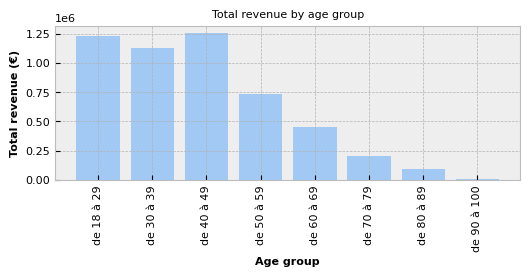

In [ ]:
plt.figure(figsize=(6, 2))

df_age_ca = pd.pivot_table(data=df, index='age_group', values='price', aggfunc='sum')
plt.bar(df_age_ca.index, df_age_ca['price'])
plt.title('Total revenue by age group',fontsize=8)

plt.ylabel("Total revenue (€)",fontsize=8)
plt.xlabel('Age group',fontsize=8)
plt.xticks(rotation = 90,fontsize=8)
plt.yticks(fontsize=8);

In [ ]:
from scipy.stats import f_oneway, levene, ttest_ind

group1 = df[df['age_group'] == 'de 18 à 29']['total_achat']
group2 = df[df['age_group'] == 'de 30 à 39']['total_achat']
group3 = df[df['age_group'] == 'de 40 à 49']['total_achat']
group4 = df[df['age_group'] == 'de 50 à 59']['total_achat']
group5 = df[df['age_group'] == 'de 60 à 69']['total_achat']
group6 = df[df['age_group'] == 'de 70 à 79']['total_achat']
group7 = df[df['age_group'] == 'de 80 à 89']['total_achat']
group8 = df[df['age_group'] == 'de 90 à 100']['total_achat']

f_stat, p_value = stats.f_oneway(group1, group2, group3,group4,group5,group6,group7,group8)

print("Statistique F :", f_stat)
print("Valeur p :", p_value)

Statistique F : 5079.048628884043
Valeur p : 0.0


Le panier moyen dépend des tranches d'âge

* H0 : La taille du panier moyen ne dépend pas de l'âge des clients.
* H1 : Les deux variables sont dépendantes.

In [ ]:
df_age_total_sales = df.groupby('age_group').sum().reset_index()
df_age_total_sales = df_age_total_sales[['age_group', 'panier_mean']]
df_age_total_sales.head()

,age_group,panier_mean
0,de 18 à 29,1218802.05
1,de 30 à 39,1122780.02
2,de 40 à 49,1246103.58
3,de 50 à 59,727410.59
4,de 60 à 69,446743.39


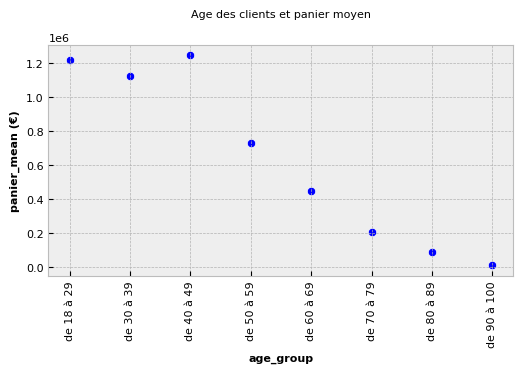

In [ ]:
plt.figure(figsize=(6, 3))
sns.scatterplot(data=df_age_total_sales, x="age_group", y="panier_mean", color='blue')
plt.title("Age des clients et panier moyen", pad=20, fontsize = 8)
plt.ylabel("panier_mean (€)",fontsize=8)
plt.xlabel('age_group',fontsize=8)
plt.xticks(rotation = 90,fontsize=8)
plt.yticks(fontsize=8);

In [ ]:
group1 = df[df['age_group'] == 'de 18 à 29']['panier_mean']
group2 = df[df['age_group'] == 'de 30 à 39']['panier_mean']
group3 = df[df['age_group'] == 'de 40 à 49']['panier_mean']
group4 = df[df['age_group'] == 'de 50 à 59']['panier_mean']
group5 = df[df['age_group'] == 'de 60 à 69']['panier_mean']
group6 = df[df['age_group'] == 'de 70 à 79']['panier_mean']
group7 = df[df['age_group'] == 'de 80 à 89']['panier_mean']
group8 = df[df['age_group'] == 'de 90 à 100']['panier_mean']

f_stat, p_value = stats.f_oneway(group1, group2, group3,group4,group5,group6,group7,group8)

print("Statistique F :", f_stat)
print("Valeur p :", p_value)

Statistique F : 67446.69846468589
Valeur p : 0.0


### CA et volume des ventes par genre

In [ ]:
df_by_sex = df.groupby(['sex']).agg(total_sales=('id_prod', 'count'), total_ca=('price', 'sum')).reset_index()

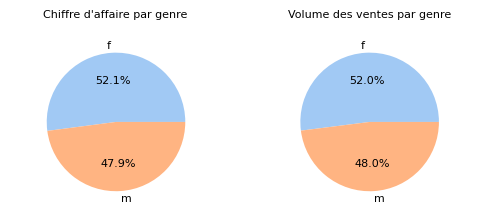

In [ ]:
plt.figure(figsize=(6,2))

plt.subplot(1,2,1)
plt.pie(df_by_sex.total_ca, autopct='%1.1f%%', labels=['f', 'm'],textprops={'fontsize': 8})
plt.axis('equal')
plt.title("Chiffre d'affaire par genre", pad=20,fontsize=8)
plt.plot()

plt.subplot(1,2,2)
plt.pie(df_by_sex.total_sales, autopct='%1.1f%%', labels=['f', 'm'],textprops={'fontsize': 8})
plt.axis('equal')
plt.title("Volume des ventes par genre", pad=20, fontsize=8)
plt.plot();

### Top 10 des produits les plus vendus dans la catégorie

In [ ]:
ca_book = df.pivot_table(index=['id_prod', 'categ'],
                         aggfunc={'price': np.sum}).sort_values(by='price', ascending=False).reset_index()
ca_book.head(5)

,id_prod,categ,price
0,2_159,2.0,44088.98
1,2_135,2.0,29458.73
2,2_112,2.0,28176.69
3,2_102,2.0,26317.30
4,2_209,2.0,24146.55


In [ ]:
ca_book_categ = df.pivot_table(index=['id_prod', 'categ'],
                         values=['price'],
                         aggfunc='sum').sort_values(by='price', ascending=False).reset_index()

ca_book_categ.head(5)

,id_prod,categ,price
0,2_159,2.0,44088.98
1,2_135,2.0,29458.73
2,2_112,2.0,28176.69
3,2_102,2.0,26317.30
4,2_209,2.0,24146.55


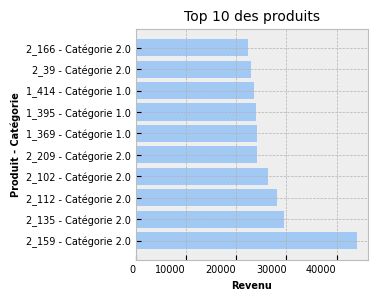

In [ ]:
top_10 = ca_book_categ.head(10)
plt.barh(top_10['id_prod'].astype(str) + ' - Catégorie ' + top_10['categ'].astype(str), top_10['price'])
plt.xlabel('Revenu',fontsize=7)
plt.ylabel('Produit - Catégorie',fontsize=7)
plt.title('Top 10 des produits',fontsize=10)
plt.xticks(fontsize=7, horizontalalignment='right')
plt.yticks(fontsize=7);

In [ ]:
ca_book_top = df.pivot_table(index=['id_prod', 'categ'],
                         aggfunc={'price': [np.sum], 'id_prod': 'count'}
                        ).sort_values(by=('price', 'sum'), ascending=False).reset_index()
ca_book_top.columns = ['id_prod', 'categ', 'nb_ventes', 'ca_total']
ca_book_top.head()

,id_prod,categ,nb_ventes,ca_total
0,2_159,2.0,302,44088.98
1,2_135,2.0,427,29458.73
2,2_112,2.0,417,28176.69
3,2_102,2.0,445,26317.30
4,2_209,2.0,345,24146.55


In [ ]:
ca_top20 = ca_book_top.sort_values(by=('nb_ventes'), ascending=False).head(20)
ca_top20.head(5)

,id_prod,categ,nb_ventes,ca_total
5,1_369,1.0,1006,24133.94
7,1_414,1.0,988,23544.04
19,1_417,1.0,947,19877.53
34,1_425,1.0,938,15936.62
12,1_498,1.0,924,21593.88


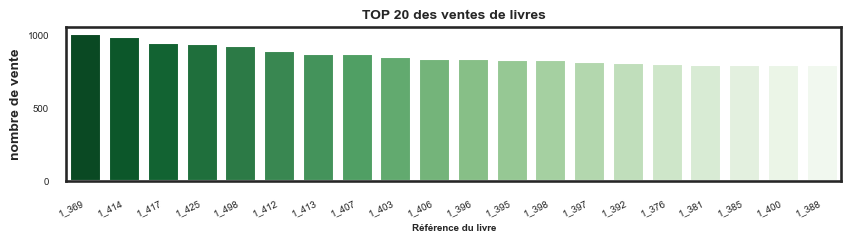

In [ ]:
sns.set_theme(style="white", context="talk")
fig, ax = plt.subplots(figsize = (10,2))

ax = sns.barplot(x=ca_top20['id_prod'], y=ca_top20["nb_ventes"], palette='Greens_r')

plt.title("TOP 20 des ventes de livres", fontsize=10, fontweight='bold')
plt.xlabel("Référence du livre", fontsize=7, fontweight='bold')
plt.ylabel("nombre de vente", fontsize=10, fontweight='bold')
plt.xticks(rotation=25, fontsize=7, horizontalalignment='right')
plt.yticks(fontsize=7);

### Répartition par catégorie

In [ ]:
df_by_categ = df.groupby(['categ']).agg(total_sales=('id_prod', 'count'), total_ca=('price', 'sum')).reset_index()
df_by_categ

,categ,total_sales,total_ca
0,0.0,175032,1862302.51
1,1.0,100231,2054236.47
2,2.0,15511,1183165.84


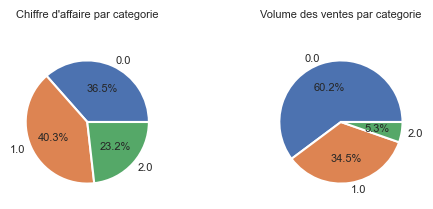

In [ ]:
plt.figure(figsize=(6,2))

categories = df['categ'].unique()

labels = [str(category) for category in categories]
plt.subplot(1,2,1)
plt.pie(df_by_categ.total_ca, autopct='%1.1f%%', labels=labels, textprops={'fontsize': 8})
plt.title("Chiffre d'affaire par categorie", pad=20, fontsize=8)

plt.subplot(1,2,2)
plt.pie(df_by_categ.total_sales, autopct='%1.1f%%', labels=labels, textprops={'fontsize': 8})
plt.title("Volume des ventes par categorie", pad=20, fontsize=8);

### Corrélations

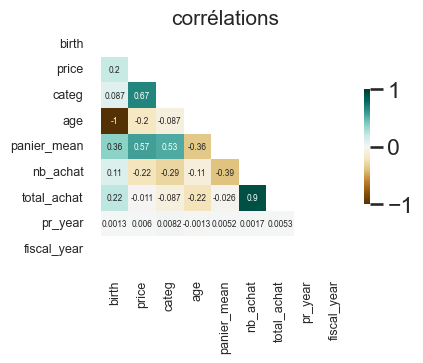

In [ ]:
plt.figure(figsize=(4, 3))

heatmap = sns.heatmap(df.corr(), mask=np.triu(np.ones_like(df.corr(), dtype=bool)),
                      vmin=-1, vmax=1, annot=True, cmap='BrBG',annot_kws={'fontsize': 6},cbar_kws={"shrink": .5})
heatmap.set_title('corrélations', fontdict={'fontsize':15}, pad=5)
plt.xticks(fontsize= 9)
plt.yticks(fontsize= 9);

### Courbe de Lorenz

In [ ]:
df_by_product = df.groupby(['id_prod']).agg(total_sales=('id_prod', 'count'),
                                                 total=('price', 'sum')).reset_index()

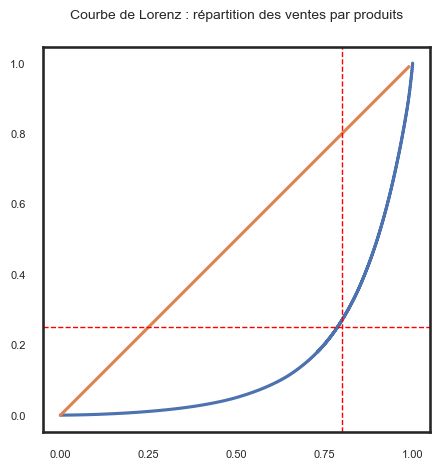

In [ ]:
rev = df_by_product['total_sales'].values
n = len(rev)
lorenz = np.cumsum(np.sort(rev)) / rev.sum()
lorenz = np.append([0],lorenz)

plt.figure(figsize=(5,5))

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1)
plt.plot(xaxis,lorenz,drawstyle='steps-post')

cst = np.arange(0,1,.01)
sns.lineplot(x=cst,y=cst)

plt.axvline(x=0.8, color='red', linestyle='--', linewidth=1)
plt.axhline(y=0.25, color='red', linestyle='--', linewidth=1)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title("Courbe de Lorenz : répartition des ventes par produits", pad=20,fontsize=10);

* 80% des ventes sont réalisées sur plus de 25% des produits.

In [ ]:
df_by_client = df.groupby('client_id').agg(total_sales=('time', 'count'), total=('price', 'sum')).reset_index()

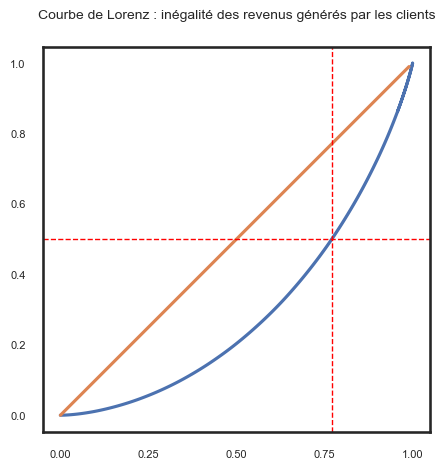

In [ ]:
rev = df_by_client['total'].values
n = len(rev)
lorenz = np.cumsum(np.sort(rev)) / rev.sum()
lorenz = np.append([0],lorenz)

plt.figure(figsize=(5,5))

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1)
plt.plot(xaxis,lorenz,drawstyle='steps-post')

cst = np.arange(0,1,.01)
sns.lineplot(x=cst,y=cst)

plt.axvline(x=0.77, color='red', linestyle='--', linewidth=1)
plt.axhline(y=0.5, color='red', linestyle='--', linewidth=1)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title("Courbe de Lorenz : inégalité des revenus générés par les clients", pad=20,fontsize=10);

* 75% des clients génèrent 50% du chiffre d'affaire.


### CA et les catégories

Les catégories influencent-ils les CA ?

* H0 : Les catégories n'influencent pas sur les CA ?

* H1 : Les catégories influencent sur les CA ?

In [ ]:
from scipy.stats import f_oneway, levene, ttest_ind

categ_ca_0 = df[df['categ'] == 0]['price']
categ_ca_1 = df[df['categ'] == 1]['price']
categ_ca_2 = df[df['categ'] == 2]['price']

f_stat, p_value = stats.f_oneway(categ_ca_0, categ_ca_1, categ_ca_2)

print("Statistique F :", f_stat)
print("Valeur p :", p_value)


Statistique F : 263498.02202651516
Valeur p : 0.0


### Chi-2 : les tranches d'âge et les catégories

Les tranches d'âge influencent-elles les catégories d'achat ?

* H0 : Il n'y a pas d'influence de la tranche d'âge sur les catégories d'achat.
* H1 : Il y a une influence de la tranche d'âge sur les catégories d'achat.

In [ ]:
df_pivot_sum = pd.pivot_table(data=df, index='age_group', columns='categ', values='price', aggfunc='sum')

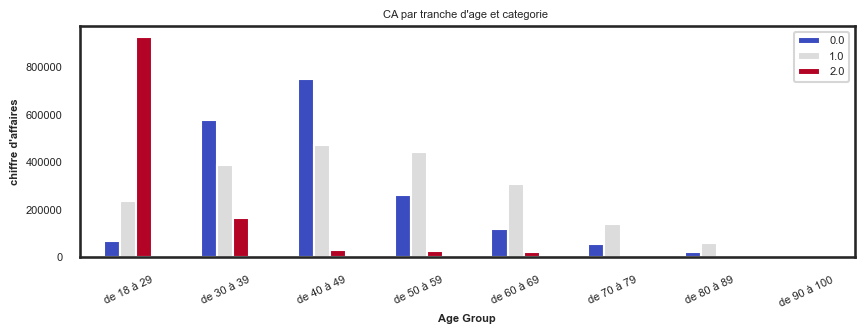

In [ ]:
df_pivot_sum.plot(kind='bar', figsize=(10,3), colormap='coolwarm')
plt.title("CA par tranche d'age et categorie ",fontsize=8)

plt.xlabel('Age Group',fontsize=8)
plt.ylabel("chiffre d'affaires",fontsize=8)
plt.xticks(rotation=25,fontsize=8)
plt.yticks(fontsize=8)
plt.legend(fontsize=8);

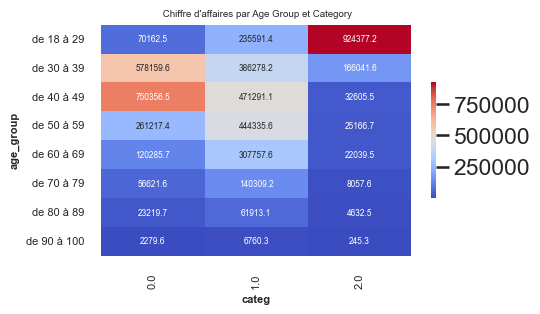

In [ ]:
plt.figure(figsize=(5, 3))
sns.heatmap(df_pivot_sum, cmap='coolwarm', annot=True, fmt='.1f',annot_kws={'fontsize': 6},cbar_kws={"shrink": .5})
plt.title(" Chiffre d'affaires par Age Group et Category", fontsize = 7)
plt.ylabel("age_group",fontsize=8)
plt.xlabel('categ',fontsize=8)
plt.xticks(rotation=90,fontsize=8)
plt.yticks(fontsize=8);

In [ ]:
# La création de mon tableau de contingence

X = "age_group"
Y = "categ"

cont_2 = df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_2

categ,0.0,1.0,2.0,Total
age_group,,,,
de 18 à 29,6589,11458,12225,30272
de 30 à 39,54334,18837,2188,75359
de 40 à 49,70675,23031,349,94055
de 50 à 59,24492,21661,312,46465
de 60 à 69,11219,15004,267,26490
de 70 à 79,5305,6905,105,12315
de 80 à 89,2197,2994,62,5253
de 90 à 100,221,341,3,565
Total,175032,100231,15511,290774


In [ ]:
stats.chi2_contingency(cont_2, correction = True)

(106933.29006361985,
 0.0,
 24,
 array([[1.82222919e+04, 1.04348836e+04, 1.61482454e+03, 3.02720000e+04],
        [4.53625031e+04, 2.59765589e+04, 4.01993799e+03, 7.53590000e+04],
        [5.66165983e+04, 3.24211474e+04, 5.01725431e+03, 9.40550000e+04],
        [2.79697011e+04, 1.60166776e+04, 2.47862125e+03, 4.64650000e+04],
        [1.59457093e+04, 9.13121252e+03, 1.41307816e+03, 2.64900000e+04],
        [7.41303927e+03, 4.24503142e+03, 6.56929316e+02, 1.23150000e+04],
        [3.16205402e+03, 1.81073082e+03, 2.80215160e+02, 5.25300000e+03],
        [3.40102898e+02, 1.94757836e+02, 3.01392662e+01, 5.65000000e+02],
        [1.75032000e+05, 1.00231000e+05, 1.55110000e+04, 2.90774000e+05]]))

* La valeur p est inférieure au niveau de signification de 0.05, il existe une relation significative entre les tranches d'âge et les catégories d'achat.

### Tranche d'âge des clients et la fréquence d’achat / Anova

Il y a une dépendance entre les tranches d'âges et les fréquences d'achat ?

* H0 : La fréquence d'achat ne dépend pas de l'âge des clients.
* H1 : Les deux variables sont dépendantes.

* Il existe donc une relation entre les tranches d'âges et les fréquences d'achat. On rejette l'hypothèse H0.



In [ ]:
# fréquence d'achat mensuelle par client
def frequence(x):
    d = {}
    d["frequence"] = (x['session_id'].count()/ x['client_id'].value_counts().count())
    return pd.Series(d, index=["frequence"])

In [ ]:
# période et par tranche d'âge
df_age_frequence = df.groupby(['pr_month','age_group']).apply(frequence)
df_age_frequence

frequence
pr_month   age_group             
2022-04-01 de 18 à 29    2.697927
           de 30 à 39    5.828152
           de 40 à 49    6.283133
           de 50 à 59    3.857003
           de 60 à 69    3.423133
...                           ...
2023-02-01 de 50 à 59    3.815446
           de 60 à 69    3.189533
           de 70 à 79    2.957704
           de 80 à 89    3.074830
           de 90 à 100   3.285714

[88 rows x 1 columns]

In [ ]:
df_age_frequence = df_age_frequence.reset_index()

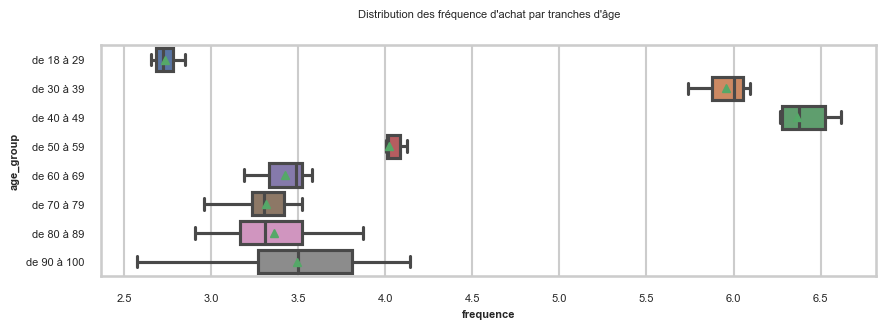

In [ ]:
plt.figure(figsize=(10,3))
sns.set_style("whitegrid")

sns.boxplot(data=df_age_frequence, x='frequence', y='age_group', orient='h', showfliers=False, showmeans=True)
plt.title("Distribution des fréquence d'achat par tranches d'âge", pad=20,fontsize=8)
plt.ylabel("age_group",fontsize=8)
plt.xlabel('frequence',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8);

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
lm = ols('frequence ~ age_group', data = df_age_frequence).fit()
import statsmodels.api;
table = sm.stats.anova_lm(lm)

In [ ]:
table

,df,sum_sq,mean_sq,F,PR(>F)
age_group,7.0,136.717820,19.531117,345.153873,5.354479e-57
Residual,80.0,4.526936,0.056587,NaN,NaN


In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              frequence   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     345.2
Date:                Sat, 27 May 2023   Prob (F-statistic):           5.35e-57
Time:                        15:38:36   Log-Likelihood:                 5.6942
No. Observations:                  88   AIC:                             4.612
Df Residuals:                      80   BIC:                             24.43
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    2.7347      0.072     38.129      0.000       2.592       2.877
age_group[T.de 30 à 39]      3.2214      0.101     31.760      0.000       3.020       3.423
age_group[T.de 40 à 49]      3.6300      0.101     35.788      0.000       3.428       3.832
age_group[T.de 50 à 59]      1.2889      0.101     12.707      0.000       1.087       1.491
age_group[T.de 60 à 69]      0.6887      0.101      6.790      0.000       0.487       0.891
age_group[T.de 70 à 79]      0.5784      0.101      5.702      0.000       0.377       0.780
age_group[T.de 80 à 89]      0.6287      0.101      6.199      0.000       0.427       0.831
age_group[T.de 90 à 100]     0.7594      0.101      7.487      0.000       0.558       0.961
==============================================================================
Omnibus:                       17.663   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.891
Skew:                          -0.670   Prob(JB):                     3.59e-09
Kurtosis:                       5.968   Cond. No.                         8.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Genre et categorie

Les genres influencent-ils les catégories d'achats ?

* H0 : Les genres n'influencent pas les catégories d'achats
* H1 : Les genres influencent les catégories d'achats

* L'hypothèse nulle est rejetée, il y a une corrélation entre le genre et la categorie des achats.

In [ ]:
genre_categca = df.pivot_table(index='sex', columns='categ', values='price', aggfunc='sum',
                               margins = True,margins_name="Total")
genre_categca

categ,0.0,1.0,2.0,Total
sex,,,,
f,963789.59,1079163.82,612243.95,2655197.36
m,898512.92,975072.65,570921.89,2444507.46
Total,1862302.51,2054236.47,1183165.84,5099704.82


In [ ]:
from scipy.stats import chi2_contingency


chi2_contingency(genre_categca)

(301.7197397871621,
 3.5015944681202916e-62,
 6,
 array([[ 969620.96486074, 1069552.73775232,  616023.65738694,
         2655197.36      ],
        [ 892681.54513926,  984683.73224768,  567142.18261306,
         2444507.46      ],
        [1862302.51      , 2054236.47      , 1183165.84      ,
         5099704.82      ]]))

<Figure size 600x700 with 0 Axes>

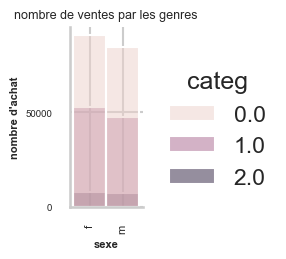

In [ ]:
plt.figure(figsize=(6,7))

sns.displot(data=df, x='sex', hue='categ', height=3, aspect=0.8)
plt.ylabel( "nombre d'achat",fontsize=8)
plt.xlabel('sexe',fontsize=8)
plt.xticks(rotation = 90 , fontsize=8)
plt.yticks(fontsize=7)
plt.title("nombre de ventes par les genres",fontsize= 9);

In [ ]:
chi2_contingency(genre_categca)

(301.7197397871621,
 3.5015944681202916e-62,
 6,
 array([[ 969620.96486074, 1069552.73775232,  616023.65738694,
         2655197.36      ],
        [ 892681.54513926,  984683.73224768,  567142.18261306,
         2444507.46      ],
        [1862302.51      , 2054236.47      , 1183165.84      ,
         5099704.82      ]]))

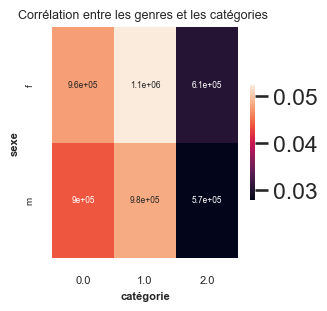

In [ ]:
tx = genre_categca.loc[:,["Total"]]
ty = genre_categca.loc[["Total"],:]
n = len(df)
indep = tx.dot(ty) / n

c = genre_categca.fillna(0)
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1], annot = c.iloc[:-1,:-1], annot_kws={'fontsize': 6},
            cbar_kws={"shrink": .5})
plt.ylabel("sexe",fontsize=8)
plt.xlabel('catégorie',fontsize=8)
plt.xticks(rotation = 0 ,fontsize=8)
plt.yticks(fontsize=7)
plt.title("Corrélation entre les genres et les catégories ",fontsize= 9);


### Test correlation - Spearman

Y a-t-il une corrélation significative entre le nombre d'achats et le montant total des achats

* Ho : Il n'y a pas de corrélation significative entre le nombre d'achats et le montant total des achats.

* Ha : Il y a une corrélation significative entre le nombre d'achats et le montant total des achats.

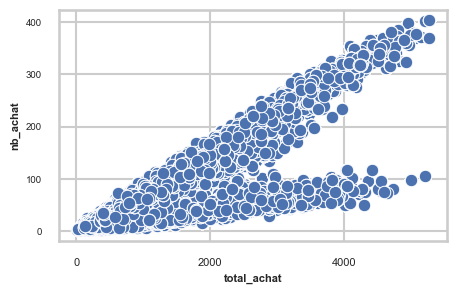

In [ ]:
plt.figure(figsize=(5, 3))

sns.scatterplot(x='total_achat', y = 'nb_achat', data = df)
plt.ylabel("nb_achat",fontsize=8)
plt.xlabel('total_achat',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=7);

In [ ]:
nb = df['nb_achat']
ta = df['total_achat']

In [ ]:
coef, p = spearmanr(nb, ta)
print('Coefficient de corrélation de Spearman : %.3f' % coef)
alpha = 0.05
if p > alpha:
    print('Les échantillons ne sont pas corrélés (échec de rejet de H0) p=%.3f' % p)
else:
    print('Les échantillons sont corrélés (rejet de H0) p=%.3f' % p)

Coefficient de corrélation de Spearman : 0.877
Les échantillons sont corrélés (rejet de H0) p=0.000


### Taille du panier moyen et les catégories des livres achetés

Le lien entre la taille du panier moyen et les catégories des livres achetés

* Ho : Il n'y a pas de lien entre le panier moyen et les catégories.
* Ha :  Il y a un lien entre le panier moyen et les catégories.

In [ ]:
from scipy.stats import f_oneway, levene, ttest_ind

group1 = df[df['categ'] == 0.0]['panier_mean']
group2 = df[df['categ'] == 1.0]['panier_mean']
group3 = df[df['categ'] == 2.0]['panier_mean']
f_stat, p_value = stats.f_oneway(group1, group2, group3)

print("Statistique F :", f_stat)
print("Valeur p :", p_value)

Statistique F : 111495.03773295213
Valeur p : 0.0


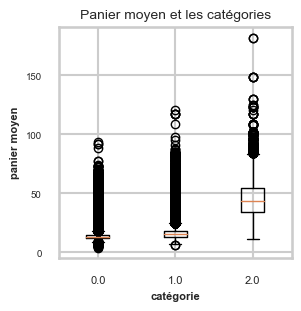

In [ ]:
fig, ax = plt.subplots()
ax.boxplot([group1, group2, group3], labels=['0.0', '1.0', '2.0'])
ax.set_xlabel('Groupes')
ax.set_ylabel('Valeur de panier moyen')
ax.set_title('Panier moyen et les catégories',fontsize=10)
plt.ylabel("panier moyen",fontsize=8)
plt.xlabel('catégorie',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=7);

Y a-t-il une corrélation significative entre l'âge et le panie moyen

* Ho : Il n'y a pas de lien entre le panier moyen et l'âge.
* Ha : Il y a un lien entre le panier moyen et l'âge.

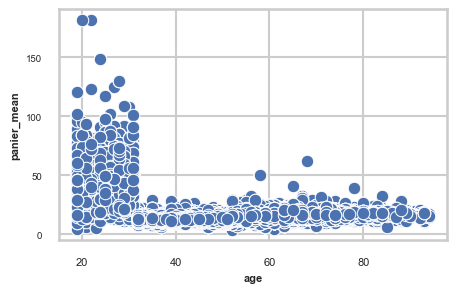

In [ ]:
plt.figure(figsize=(5, 3))

sns.scatterplot(x='age', y = 'panier_mean', data = df)
plt.ylabel("panier_mean",fontsize=8)
plt.xlabel('age',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=7);

In [ ]:
a = df['panier_mean']
b = df['age']

coef, p = spearmanr(a, b)
print('Coefficient de corrélation de Spearman : %.3f' % coef)
alpha = 0.05
if p > alpha:
    print('Les échantillons ne sont pas corrélés (échec de rejet de H0) p=%.3f' % p)
else:
    print('Les échantillons sont corrélés (rejet de H0) p=%.3f' % p)

Coefficient de corrélation de Spearman : 0.063
Les échantillons sont corrélés (rejet de H0) p=0.000
